In [591]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import pymc3 as pm
import arviz as az

# COPEPOD DATA: Abundance and corresponding total Carbon Mass

In [592]:
Data_PATH = '/net/meso/work/svivier/Git/Data/'
Plot_PATH = '/net/meso/work/svivier/Git/Plots/'

In [593]:
Carbonmass = pd.read_csv(Data_PATH + 'CarbonMass_matrix.csv')
Carbonmass.set_index('unique_id', inplace=True)

In [594]:
Carbonmass

Carbon Mass
unique_id                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...     2.878586
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...    17.761304
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...     2.517407
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...    11.215845
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...     8.311358
...                                                         ...
T028-990522_1999_  6_  4_ 20.317_ 20.317_  44.8...     3.369213
T028-990522_1999_  6_  4_ 20.750_ 20.750_  44.8...     4.284212
T028-990522_1999_  6_  4_ 21.217_ 21.217_  44.8...     1.331615
T028-990522_1999_  6_  4_ 21.633_ 21.633_  44.8...     3.585539
T028-990522_1999_  6_  4_ 22.083_ 22.083_  44.8...     1.469750

[12288 rows x 1 columns]

In [595]:
Abundance = pd.read_csv(Data_PATH + 'MeasurementValue_matrix.csv')
Abundance.set_index('unique_id', inplace=True)

In [596]:
Abundance

Acartia  Acartia bifilosa  \
unique_id                                                                       
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...      0.0               0.0   
...                                                     ...               ...   
T028-990522_1999_  6_  4_ 20.317_ 20.317_  44.8...      0.0               0.0   
T028-990522_1999_  6_  4_ 20.750_ 20.750_  44.8...      0.0               0.0   
T028-990522_1999_  6_  4_ 21.217_ 21.217_  44.8...      0.0               0.0   
T028-990522_1999_  6_  4_ 21.633_ 21.633_  44.8...      0.0               0.0   
T028-990522_1999_  6_  4_ 22.083_ 22.083_  44.8...      0.0               0.0   

                                                    Acartia longiremis  \
unique_id                                                                
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                 0.0   
...                                                                ...   
T028-990522_1999_  6_  4_ 20.317_ 20.317_  44.8...                 0.0   
T028-990522_1999_  6_  4_ 20.750_ 20.750_  44.8...                 0.0   
T028-990522_1999_  6_  4_ 21.217_ 21.217_  44.8...                 0.0   
T028-990522_1999_  6_  4_ 21.633_ 21.633_  44.8...                 0.0   
T028-990522_1999_  6_  4_ 22.083_ 22.083_  44.8...                 0.0   

                                                    Acartia spp.  \
unique_id                                                          
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...           0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...           0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...           0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...           0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...           0.0   
...                                                          ...   
T028-990522_1999_  6_  4_ 20.317_ 20.317_  44.8...           0.0   
T028-990522_1999_  6_  4_ 20.750_ 20.750_  44.8...           0.0   
T028-990522_1999_  6_  4_ 21.217_ 21.217_  44.8...           0.0   
T028-990522_1999_  6_  4_ 21.633_ 21.633_  44.8...           0.0   
T028-990522_1999_  6_  4_ 22.083_ 22.083_  44.8...           0.0   

                                                    Aetideopsis multiserrata  \
unique_id                                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                       0.0   
...                                                                      ...   
T028-990522_1999_  6_  4_ 20.317_ 20.317_  44.8...                       0.0   
T028-990522_1999_  6_  4_ 20.750_ 20.750_  44.8...                       0.0   
T028-990522_1999_  6_  4_ 21.217_ 21.217_  44.8...                       0.0   
T028-990522_1999_  6_  4_ 21.633_ 21.633_  44.8...                       0.0   
T028-990522_1999_  6_  4_ 22.083_ 22.083_  44.8...                       0.0   

                                                    Aglantha digitale  \
unique_id                           

In [597]:
# Change 'Calanus finmarchicus (aff)' in 'Calanus finmarchicus'
def clean_column_name(col):
    col = col.replace('(aff)', '')
    return col.strip()

# Renommer les colonnes
Abundance.rename(columns=clean_column_name, inplace=True)

In [598]:
# Sum columns with the same 'Taxa-Name' (new 'Calanus finmarchicus' with 'Calanus finmarchicus')
Abundance = Abundance.groupby(level=0, axis=1).sum()

# AtlantECO Individual Carbon Weight (ICWs) + construction of Final dataset used to evaluate AtlanteCO ICWs and to run inverse model
Here we construct our final matrix: COPEPOD80_df_clean (final abundance Matrix) and COPEPOD80_BIOMASS (final total biomass matrix):

Samples that has more than 70% of copepod in the Total abundance, and without extrem values (if there are some)
To do this we use 'CarbonMass_AtlantECO' that correspond to all the carbon mass of each copepods species in AtlantECO 

In [599]:
# ICWs for each species in AtlantECO
CarbonMass_AtlantECO = pd.read_csv( Data_PATH + 'CarbonMass_Atlanteco.csv')

In [600]:
CarbonMass_AtlantECO.set_index('Measurement', inplace=True) #Measurement in line index

In [601]:
CarbonMass_AtlantECO=CarbonMass_AtlantECO/10 #Correction of the x10 error in the AtlantECO ICWs

In [602]:
#Enlever les parenthèses, to match with 'Taxa-Name' of 'Abundance'
CarbonMass_AtlantECO.columns = CarbonMass_AtlantECO.columns.str.replace(r"\s*\([^)]*\)", "", regex=True)
CarbonMass_AtlantECO

Acartia bifilosa  Acartia fossae  Acartia pietschmani  \
Measurement                                                             
MaxCarbonMass           0.001880        0.009860              0.00986   
MeanCarbonMass          0.001808        0.009739              0.00986   
MinCarbonMass           0.001736        0.009677              0.00986   

                Acartia sinjiensis  Acartia spinata  Acartia tonsa  \
Measurement                                                          
MaxCarbonMass             0.009860         0.009860       0.006680   
MeanCarbonMass            0.009855         0.006777       0.003466   
MinCarbonMass             0.009852         0.005798       0.000693   

                Acartia danae  Acartia negligens  Acartia clausi  \
Measurement                                                        
MaxCarbonMass        0.009842            0.00335        0.003847   
MeanCarbonMass       0.003594            0.00335        0.002595   
MinCarbonMass        0.000345            0.00335        0.000171   

                Acartia longiremis  Acartia simplex  Acartia tranteri  \
Measurement                                                             
MaxCarbonMass             0.005127         0.009860          0.003506   
MeanCarbonMass            0.004192         0.009843          0.002653   
MinCarbonMass             0.003352         0.009834          0.001800   

                Acartia amboinensis  Acartia australis  Acartia bispinosa  \
Measurement                                                                 
MaxCarbonMass              0.009860             0.0038           0.009860   
MeanCarbonMass             0.009850             0.0038           0.009855   
MinCarbonMass              0.009845             0.0038           0.009853   

                Acartia erythraea  Acartia pacifica  Acartia spinicauda  \
Measurement                                                               
MaxCarbonMass               0.004            0.0032             0.00986   
MeanCarbonMass              0.004            0.0032             0.00986   
MinCarbonMass               0.004            0.0032             0.00986   

                Acrocalanus andersoni  Acrocalanus gibber  \
Measurement                                                 
MaxCarbonMass                  0.0016              0.0016   
MeanCarbonMass                 0.0016              0.0016   
MinCarbonMass                  0.0016              0.0016   

                Acrocalanus gracilis  Acrocalanus longicornis  \
Measurement                                                     
MaxCarbonMass                 0.0016                   0.0016   
MeanCarbonMass                0.0016                   0.0016   
MinCarbonMass                 0.0016                   0.0016   

                Acrocalanus monachus  Aegisthus aculeatus  \
Measurement                                                 
MaxCarbonMass                 0.0016              0.00120   
MeanCarbonMass                0.0016              0.00089   
MinCarbonMass                 0.0016              0.00048   

                Aegisthus mucronatus  Aetideopsis antarctica  \
Measurement                                                    
MaxCarbonMass                0.00120                0.506000   
MeanCarbonMass               0.00089                0.342644   
MinCarbonMass                0.00048                0.217600   

                Aetideopsis armata  Aetideopsis carinata  Aetideopsis minor  \
Measurement                                                                   
MaxCarbonMass             0.506000              0.506000           0.506000   
MeanCarbonMass            0.342311              0.342026           0.342162   
MinCarbonMass             0.217600              0.217600           0.217600   

                Aetideopsis multiserrata  Aetideopsis rostrata  \
Measurement                                                      
MaxCarbonMass                   0.506000   

In [603]:
#'Abundance' our COPEPOD abundance data, calculate predicted biomass using AtlantECO ICWs:

# Étape 1: Récupérer les noms des colonnes de Abundance
taxa_names = Abundance.columns

# Étape 2: Créer df_AtlantECO avec les mêmes noms de colonnes
# et initialiser avec des valeurs NaN pour 'MinCarbonMass', 'MeanCarbonMass', 'MaxCarbonMass'
df_AtlantECO = pd.DataFrame(index=['MinCarbonMass', 'MeanCarbonMass', 'MaxCarbonMass'], columns=taxa_names)



df_AtlantECO

Acartia Acartia bifilosa Acartia longiremis Acartia spp.  \
MinCarbonMass      NaN              NaN                NaN          NaN   
MeanCarbonMass     NaN              NaN                NaN          NaN   
MaxCarbonMass      NaN              NaN                NaN          NaN   

               Aetideopsis multiserrata Aglantha digitale Aglantha spp.  \
MinCarbonMass                       NaN               NaN           NaN   
MeanCarbonMass                      NaN               NaN           NaN   
MaxCarbonMass                       NaN               NaN           NaN   

               Agonidae Aidanosagitta crassa naikaiensis  \
MinCarbonMass       NaN                              NaN   
MeanCarbonMass      NaN                              NaN   
MaxCarbonMass       NaN                              NaN   

               Aidanosagitta regularis Alima Alteutha interrupta  \
MinCarbonMass                      NaN   NaN                 NaN   
MeanCarbonMass                     NaN   NaN                 NaN   
MaxCarbonMass                      NaN   NaN                 NaN   

               Ammodytes hexapterus Amphipoda Anguilliformes Annelida Anomura  \
MinCarbonMass                   NaN       NaN            NaN      NaN     NaN   
MeanCarbonMass                  NaN       NaN            NaN      NaN     NaN   
MaxCarbonMass                   NaN       NaN            NaN      NaN     NaN   

               Anthoathecatae Anthozoa Anurida maritima Appendicularia  \
MinCarbonMass             NaN      NaN              NaN            NaN   
MeanCarbonMass            NaN      NaN              NaN            NaN   
MaxCarbonMass             NaN      NaN              NaN            NaN   

               Arachnactis Ascidiacea Asterionella bleakeleyi  \
MinCarbonMass          NaN        NaN                     NaN   
MeanCarbonMass         NaN        NaN                     NaN   
MaxCarbonMass          NaN        NaN                     NaN   

               Asterionella japonica Atlantidiidae Augaptilus glacialis  \
MinCarbonMass                    NaN           NaN                  NaN   
MeanCarbonMass                   NaN           NaN                  NaN   
MaxCarbonMass                    NaN           NaN                  NaN   

               Bacteriastrum hyalinum Balanus Balanus balanus  \
MinCarbonMass                     NaN     NaN             NaN   
MeanCarbonMass                    NaN     NaN             NaN   
MaxCarbonMass                     NaN     NaN             NaN   

               Balanus crenatus Balanus spp. Bathymasteridae Beroe spp.  \
MinCarbonMass               NaN          NaN             NaN        NaN   
MeanCarbonMass              NaN          NaN             NaN        NaN   
MaxCarbonMass               NaN          NaN             NaN        NaN   

               Bivalvia Bolinopsis infundibulum Bolinopsis spp.  \
MinCarbonMass       NaN                     NaN             NaN   
MeanCarbonMass      NaN                     NaN             NaN   
MaxCarbonMass       NaN                     NaN             NaN   

               Bougainvillia superciliaris Brachiopoda Brachyura  \
MinCarbonMass                          NaN         NaN       NaN   
MeanCarbonMass                         NaN         NaN       NaN   
MaxCarbonMass                          NaN         NaN       NaN   

               Bradyidius similis Branchiostoma Calanoida Calanoides acutus  \
MinCarbonMass                 NaN           NaN       NaN               NaN   
MeanCarbonMass                NaN           NaN       NaN               NaN   
MaxCarbonMass                 NaN           NaN       NaN               NaN   

               Calanus Calanus cristatus Calanus finmarchicus  \
MinCarbonMass      NaN               NaN                  NaN   
MeanCarbonMass     NaN               NaN                  NaN   
MaxCarbonMass      NaN               NaN                  NaN   

               Calanus glacialis 

In [604]:
# Remplir df_AtlantECO avec les valeurs correspondantes
for taxa_name in df_AtlantECO.columns:
    if taxa_name in CarbonMass_AtlantECO.columns:
        # Pour chaque ligne (Min, Mean, Max), copier les valeurs de CarbonMass_AtlantECO à df_AtlantECO
        df_AtlantECO.loc['MinCarbonMass', taxa_name] = CarbonMass_AtlantECO.loc['MinCarbonMass', taxa_name]
        df_AtlantECO.loc['MeanCarbonMass', taxa_name] = CarbonMass_AtlantECO.loc['MeanCarbonMass', taxa_name]
        df_AtlantECO.loc['MaxCarbonMass', taxa_name] = CarbonMass_AtlantECO.loc['MaxCarbonMass', taxa_name]

# Afficher df_AtlantECO pour vérification
df_AtlantECO


Acartia Acartia bifilosa Acartia longiremis Acartia spp.  \
MinCarbonMass      NaN         0.001736           0.003352          NaN   
MeanCarbonMass     NaN         0.001808           0.004192          NaN   
MaxCarbonMass      NaN          0.00188           0.005127          NaN   

               Aetideopsis multiserrata Aglantha digitale Aglantha spp.  \
MinCarbonMass                    0.2176               NaN           NaN   
MeanCarbonMass                 0.341113               NaN           NaN   
MaxCarbonMass                     0.506               NaN           NaN   

               Agonidae Aidanosagitta crassa naikaiensis  \
MinCarbonMass       NaN                              NaN   
MeanCarbonMass      NaN                              NaN   
MaxCarbonMass       NaN                              NaN   

               Aidanosagitta regularis Alima Alteutha interrupta  \
MinCarbonMass                      NaN   NaN             0.00048   
MeanCarbonMass                     NaN   NaN             0.00089   
MaxCarbonMass                      NaN   NaN              0.0012   

               Ammodytes hexapterus Amphipoda Anguilliformes Annelida Anomura  \
MinCarbonMass                   NaN       NaN            NaN      NaN     NaN   
MeanCarbonMass                  NaN       NaN            NaN      NaN     NaN   
MaxCarbonMass                   NaN       NaN            NaN      NaN     NaN   

               Anthoathecatae Anthozoa Anurida maritima Appendicularia  \
MinCarbonMass             NaN      NaN              NaN            NaN   
MeanCarbonMass            NaN      NaN              NaN            NaN   
MaxCarbonMass             NaN      NaN              NaN            NaN   

               Arachnactis Ascidiacea Asterionella bleakeleyi  \
MinCarbonMass          NaN        NaN                     NaN   
MeanCarbonMass         NaN        NaN                     NaN   
MaxCarbonMass          NaN        NaN                     NaN   

               Asterionella japonica Atlantidiidae Augaptilus glacialis  \
MinCarbonMass                    NaN           NaN              0.00155   
MeanCarbonMass                   NaN           NaN             0.337437   
MaxCarbonMass                    NaN           NaN             1.936164   

               Bacteriastrum hyalinum Balanus Balanus balanus  \
MinCarbonMass                     NaN     NaN             NaN   
MeanCarbonMass                    NaN     NaN             NaN   
MaxCarbonMass                     NaN     NaN             NaN   

               Balanus crenatus Balanus spp. Bathymasteridae Beroe spp.  \
MinCarbonMass               NaN          NaN             NaN        NaN   
MeanCarbonMass              NaN          NaN             NaN        NaN   
MaxCarbonMass               NaN          NaN             NaN        NaN   

               Bivalvia Bolinopsis infundibulum Bolinopsis spp.  \
MinCarbonMass       NaN                     NaN             NaN   
MeanCarbonMass      NaN                     NaN             NaN   
MaxCarbonMass       NaN                     NaN             NaN   

               Bougainvillia superciliaris Brachiopoda Brachyura  \
MinCarbonMass                          NaN         NaN       NaN   
MeanCarbonMass                         NaN         NaN       NaN   
MaxCarbonMass                          NaN         NaN       NaN   

               Bradyidius similis Branchiostoma Calanoida Calanoides acutus  \
MinCarbonMass              0.2176           NaN       NaN          0.125339   
MeanCarbonMass              0.343           NaN       NaN          0.159341   
MaxCarbonMass               0.506           NaN       NaN          0.193342   

               Calanus Calanus cristatus Calanus finmarchicus  \
MinCarbonMass      NaN               NaN               0.2146   
MeanCarbonMass     NaN               NaN               0.2146   
MaxCarbonMass      NaN               NaN               0.2146   

               Calanus glacialis 

In [605]:
###____Rajouter 'Acartia'
TaxaName='Acartia', 'Acartia spp.'

df_AtlantECO.loc['MinCarbonMass', TaxaName] = 0.000095		 # Remplacer valeur_min_taxaname1 par la valeur réelle
df_AtlantECO.loc['MeanCarbonMass', TaxaName] = 0.0034357966  # Remplacer valeur_mean_taxaname1 par la valeur réelle
df_AtlantECO.loc['MaxCarbonMass', TaxaName] = 0.00986

In [606]:
df_AtlantECO = df_AtlantECO.fillna(0)

In [607]:
df_AtlantECO #The ICWs of AtlantECO for each copepod species in the Abundance matrix (ICW=0 if the species it is not a copepod present in AtlantECO)

Acartia  Acartia bifilosa  Acartia longiremis  Acartia spp.  \
MinCarbonMass   0.000095          0.001736            0.003352      0.000095   
MeanCarbonMass  0.003436          0.001808            0.004192      0.003436   
MaxCarbonMass   0.009860          0.001880            0.005127      0.009860   

                Aetideopsis multiserrata  Aglantha digitale  Aglantha spp.  \
MinCarbonMass                   0.217600                  0              0   
MeanCarbonMass                  0.341113                  0              0   
MaxCarbonMass                   0.506000                  0              0   

                Agonidae  Aidanosagitta crassa naikaiensis  \
MinCarbonMass          0                                 0   
MeanCarbonMass         0                                 0   
MaxCarbonMass          0                                 0   

                Aidanosagitta regularis  Alima  Alteutha interrupta  \
MinCarbonMass                         0      0              0.00048   
MeanCarbonMass                        0      0              0.00089   
MaxCarbonMass                         0      0              0.00120   

                Ammodytes hexapterus  Amphipoda  Anguilliformes  Annelida  \
MinCarbonMass                      0          0               0         0   
MeanCarbonMass                     0          0               0         0   
MaxCarbonMass                      0          0               0         0   

                Anomura  Anthoathecatae  Anthozoa  Anurida maritima  \
MinCarbonMass         0               0         0                 0   
MeanCarbonMass        0               0         0                 0   
MaxCarbonMass         0               0         0                 0   

                Appendicularia  Arachnactis  Ascidiacea  \
MinCarbonMass                0            0           0   
MeanCarbonMass               0            0           0   
MaxCarbonMass                0            0           0   

                Asterionella bleakeleyi  Asterionella japonica  Atlantidiidae  \
MinCarbonMass                         0                      0              0   
MeanCarbonMass                        0                      0              0   
MaxCarbonMass                         0                      0              0   

                Augaptilus glacialis  Bacteriastrum hyalinum  Balanus  \
MinCarbonMass               0.001550                       0        0   
MeanCarbonMass              0.337437                       0        0   
MaxCarbonMass               1.936164                       0        0   

                Balanus balanus  Balanus crenatus  Balanus spp.  \
MinCarbonMass                 0                 0             0   
MeanCarbonMass                0                 0             0   
MaxCarbonMass                 0                 0             0   

                Bathymasteridae  Beroe spp.  Bivalvia  \
MinCarbonMass                 0           0         0   
MeanCarbonMass                0           0         0   
MaxCarbonMass                 0           0         0   

                Bolinopsis infundibulum  Bolinopsis spp.  \
MinCarbonMass                         0                0   
MeanCarbonMass                        0                0   
MaxCarbonMass                         0                0   

                Bougainvillia superciliaris  Brachiopoda  Brachyura  \
MinCarbonMass                             0            0          0   
MeanCarbonMass                            0            0          0   
MaxCarbonMass                             0            0          0   

                Bradyidius similis  Branchiostoma  Calanoida  \
MinCarbonMass               0.2176              0          0   
MeanCarbonMass              0.3430              0          0   
MaxCarbonMass               0.5060              0          0   

                Calanoides acutus  Calanus  Calanus cristatus  \
MinCarbonMass            0.125339        0            

In [608]:
# Calcul of the predicted biomass of our COPEPOD samples using AtlantECO ICWs

import pandas as pd

df_abondance=Abundance.copy()

# Créer des colonnes pour les sommes totales de Min, Mean, Max CarbonMass
df_abondance['Total_MinCarbonMass'] = 0
df_abondance['Total_MeanCarbonMass'] = 0
df_abondance['Total_MaxCarbonMass'] = 0

# Itérer sur chaque colonne (espèce) dans df_abondance pour calculer les sommes
for taxa_name in df_abondance.columns:
    if taxa_name in df_AtlantECO.columns:
        df_abondance['Total_MinCarbonMass'] += df_abondance[taxa_name] * df_AtlantECO.loc['MinCarbonMass', taxa_name]
        df_abondance['Total_MeanCarbonMass'] += df_abondance[taxa_name] * df_AtlantECO.loc['MeanCarbonMass', taxa_name]
        df_abondance['Total_MaxCarbonMass'] += df_abondance[taxa_name] * df_AtlantECO.loc['MaxCarbonMass', taxa_name]


In [609]:
# Take off samples where predicted biomass=0 => samples without copepods species data
df_abondance = df_abondance[
    (df_abondance['Total_MinCarbonMass'] != 0) &
    (df_abondance['Total_MeanCarbonMass'] != 0) &
    (df_abondance['Total_MaxCarbonMass'] != 0)
]
df_abondance = df_abondance.dropna(subset=['Total_MinCarbonMass', 'Total_MeanCarbonMass', 'Total_MaxCarbonMass'])
# Afficher les lignes filtrées
df_abondance

Acartia  Acartia bifilosa  \
unique_id                                                                       
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...      0.0               0.0   
...                                                     ...               ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   

                                                    Acartia longiremis  \
unique_id                                                                
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                 0.0   
...                                                                ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   

                                                    Acartia spp.  \
unique_id                                                          
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...          0.00   
...                                                          ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.00   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.19   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.74   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.12   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...          8.18   

                                                    Aetideopsis multiserrata  \
unique_id                                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                       0.0   
...                                                                      ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   

                                                    Aglantha digitale  \
unique_id                           

In [610]:
# We add predicted biomass in the Carbonmass Matrix and we take off data where predicted biomass=0 (data without COPEPOD species)

# Sélectionner uniquement les colonnes d'intérêt de df_abundance avant la fusion
columns_to_add = df_abondance[['Total_MinCarbonMass', 'Total_MeanCarbonMass', 'Total_MaxCarbonMass']]


# Fusionner df_biomass_reel avec les colonnes sélectionnées de df_abundance
df_biomass_final = Carbonmass.join(columns_to_add, how='left')



# Cette méthode ajoute uniquement les colonnes Total_MinCarbonMass, Total_MeanCarbonMass, et Total_MaxCarbonMass à df_biomass_reel
# Enlever les lignes avec des valeurs NaN dans les colonnes spécifiques
df_biomass_final = df_biomass_final.dropna(subset=['Total_MinCarbonMass', 'Total_MeanCarbonMass', 'Total_MaxCarbonMass'])



In [611]:
# filtered_abondance and filtered_biomass_final => Data with at least 1 copepod

filtered_abondance = df_abondance.iloc[:, :-3]
filtered_biomass_final = df_biomass_final.iloc[:, :-3]

In [612]:
filtered_abondance

Acartia  Acartia bifilosa  \
unique_id                                                                       
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...      0.0               0.0   
...                                                     ...               ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   

                                                    Acartia longiremis  \
unique_id                                                                
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                 0.0   
...                                                                ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   

                                                    Acartia spp.  \
unique_id                                                          
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...          0.00   
...                                                          ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.00   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.19   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.74   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.12   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...          8.18   

                                                    Aetideopsis multiserrata  \
unique_id                                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                       0.0   
...                                                                      ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   

                                                    Aglantha digitale  \
unique_id                           

In [613]:
filtered_biomass_final

Carbon Mass
unique_id                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...     2.878586
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...    17.761304
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...     2.517407
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...    11.215845
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...     8.311358
...                                                         ...
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     0.103977
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     1.126274
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     4.410456
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     6.730864
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     2.072564

[2029 rows x 1 columns]

In [614]:
# Take off extrem value: Average carbonmass per individuals
def remove_extreme_values(abundance, biomass):
    # Calculer la masse carbonique moyenne par échantillon
    sum_abundances = abundance.sum(axis=1)
    carbon_mass_per_sample = biomass['Carbon Mass'] / sum_abundances

    # Définir les seuils pour les 5% des valeurs les plus extrêmes
    low_quantile = carbon_mass_per_sample.quantile(0)
    high_quantile = carbon_mass_per_sample.quantile(0.99)

    # Filtrer les données pour éliminer les valeurs extrêmes
    valid_samples = carbon_mass_per_sample.between(low_quantile, high_quantile)
    filtered_abundance = abundance[valid_samples]
    filtered_biomass = biomass[valid_samples]

    return filtered_abundance, filtered_biomass

# Application de la fonction de nettoyage
filtered_abondance_clean, filtered_biomass_final_clean = remove_extreme_values(filtered_abondance, filtered_biomass_final)


In [615]:
# Calcul des statistiques pour les données nettoyées
sum_abundances_clean = filtered_abondance_clean.sum(axis=1)
masse_carbone_moyenne_par_echantillon_clean = filtered_biomass_final_clean['Carbon Mass'] / sum_abundances_clean

# Calcul des statistiques de base
moyenne_masse_carbone_clean = masse_carbone_moyenne_par_echantillon_clean.mean()
max_masse_carbone_clean = masse_carbone_moyenne_par_echantillon_clean.max()
min_masse_carbone_clean = masse_carbone_moyenne_par_echantillon_clean.min()
mediane_masse_carbone_clean = masse_carbone_moyenne_par_echantillon_clean.median()
std_masse_carbone_clean = masse_carbone_moyenne_par_echantillon_clean.std()

moyenne_masse_carbone_clean, max_masse_carbone_clean, min_masse_carbone_clean, mediane_masse_carbone_clean, std_masse_carbone_clean

(0.032625785273082124,
 0.7492898240525147,
 1.0086414324819841e-05,
 0.012993088662809578,
 0.07095957430016873)

In [616]:
# We take off Taxa with no abundance value

filtered_abondance_clean = filtered_abondance_clean.loc[:, filtered_abondance.apply(lambda col: (col != 0).any())]

In [617]:
filtered_abondance_clean

Acartia  Acartia bifilosa  \
unique_id                                                                       
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...      0.0               0.0   
...                                                     ...               ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   

                                                    Acartia longiremis  \
unique_id                                                                
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                 0.0   
...                                                                ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   

                                                    Acartia spp.  \
unique_id                                                          
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...          0.00   
...                                                          ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.00   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.19   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.74   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.12   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...          8.18   

                                                    Aetideopsis multiserrata  \
unique_id                                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                       0.0   
...                                                                      ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   

                                                    Aglantha digitale  \
unique_id                           

In [618]:
filtered_biomass_final_clean

Carbon Mass
unique_id                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...     2.878586
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...    17.761304
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...     2.517407
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...    11.215845
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...     8.311358
...                                                         ...
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     0.103977
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     1.126274
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     4.410456
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     6.730864
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     2.072564

[2008 rows x 1 columns]

In [619]:
####_ on enlève les lignes qui ne possède + de 70% d'abondance de copepods

import pandas as pd


# Identifier les espèces en commun entre les deux jeux de données (Copepod species)
common_species = list(set(filtered_abondance_clean.columns).intersection(CarbonMass_AtlantECO.columns))

# Calculer le pourcentage d'abondance pour les espèces en commun pour chaque ligne (% of copepod species)
filtered_abondance_clean['common_abundance'] = filtered_abondance_clean[common_species].sum(axis=1) / filtered_abondance_clean.sum(axis=1)

# Filtrer les lignes où l'abondance des espèces en commun est supérieure à 70% (take off samples where copepods do not represent >70% of total abundance)
COPEPOD80_df = filtered_abondance_clean[filtered_abondance_clean['common_abundance'] > 0.7].drop(columns=['common_abundance'])

# Afficher le résultat
COPEPOD80_df


Acartia  Acartia bifilosa  \
unique_id                                                                       
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...      0.0               0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...      0.0               0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...      0.0               0.0   
...                                                     ...               ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...      0.0               0.0   

                                                    Acartia longiremis  \
unique_id                                                                
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                 0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                 0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                 0.0   
...                                                                ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                 0.0   

                                                    Acartia spp.  \
unique_id                                                          
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...          0.00   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...          0.00   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...          0.00   
...                                                          ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.00   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...          0.19   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.74   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...         16.12   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...          8.18   

                                                    Aetideopsis multiserrata  \
unique_id                                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...                       0.0   
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...                       0.0   
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...                       0.0   
...                                                                      ...   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...                       0.0   

                                                    Aglantha digitale  \
unique_id                           

In [620]:
COPEPOD80_df_clean = COPEPOD80_df.loc[:, COPEPOD80_df.apply(lambda col: (col != 0).any())] ## On enlève les espèces qui ne sont plus représenté dans le dataframe

In [621]:
# If we want to groupe species that are not dominant (here <1% of total abundance) into one 'non-dominant group':


# Calcul de la somme totale des abondances pour chaque ligne
total_abundance_per_sample = COPEPOD80_df_clean.sum(axis=1)

# Initialisation d'une liste pour stocker les noms des espèces à supprimer
species_to_remove = []

# Parcourir chaque espèce pour calculer sa contribution maximale
for species in COPEPOD80_df_clean.columns:
    # Calculer la contribution de l'espèce pour chaque ligne
    species_contribution = COPEPOD80_df_clean[species] / total_abundance_per_sample
    
    # Trouver la contribution maximale pour l'espèce
    max_contribution = species_contribution.max()
    
    # Vérifier si la contribution maximale est inférieure à 1%
    if max_contribution < 0.01:
        species_to_remove.append(species)

# Afficher la liste des espèces à supprimer
print("Espèces dont la contribution maximale est inférieure à 1% :")
print(species_to_remove)


Espèces dont la contribution maximale est inférieure à 1% :
['Aetideopsis multiserrata', 'Alteutha interrupta', 'Candacia armata', 'Chiridius obtusifrons', 'Cladocera', 'Clione', 'Cyclopina longicornis', 'Danielssenia typica', 'Discoconchoecia elegans', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Eukrohnia hamata', 'Gaetanus brevispinus', 'Gaidius tenuispinus', 'Haloptilus acutifrons', 'Harpacticus chelifer', 'Heterorhabdus norvegicus', 'Hyas', 'Laophonte perplexa', 'Lepas spp.', 'Mimocalanus distinctocephalus', 'Obelia longissima', 'Obelia spp.', 'Oncaea notopus', 'Oncaea spp.', 'Paraeuchaeta norvegica', 'Paraheterorhabdus compactus', 'Parathalestris croni', 'Parathalestris harpactoides', 'Pseudochirella spectabilis', 'Rathkea octopunctata', 'Rathkea spp.', 'Rhynchothalestris helgolandica', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Spinocalanus magnus', 'Spinocalanus spinosus', 'Staurophora spp.', 'Syllides spp.', 'Tegastes falcatus', 'Zaus goodsiri', 'Zaus spp.']


In [622]:
# Mettre à jour BIOMASS_sampled pour refléter les lignes supprimées dans filtered_abondance_clean
COPEPOD80_BIOMASS = filtered_biomass_final_clean.loc[COPEPOD80_df_clean.index]

# Afficher le résultat pour vérifier
COPEPOD80_BIOMASS

Carbon Mass
unique_id                                                      
06AQ-910604_1991_  6_  8_ 99.990_-99.000_  79.0...     2.878586
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.6...    17.761304
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  78.9...     2.517407
06AQ-910604_1991_  6_  9_ 99.990_-99.000_  79.0...    11.215845
06AQ-910604_1991_  6_ 10_ 99.990_-99.000_  78.8...     8.311358
...                                                         ...
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     0.103977
90PO-540908_1954_  9_ 17_ 19.170_-99.000_  69.2...     1.126274
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     4.410456
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     6.730864
90PO-540908_1954_  9_ 17_ 21.330_-99.000_  69.1...     2.072564

[1027 rows x 1 columns]

In [623]:
min_value = COPEPOD80_BIOMASS['Carbon Mass'].min()
median_value = COPEPOD80_BIOMASS['Carbon Mass'].median()
max_value = COPEPOD80_BIOMASS['Carbon Mass'].max()

print("Minimum:", min_value)
print("Médiane:", median_value)
print("Maximum:", max_value)


Minimum: 0.0309655243203759
Médiane: 1.4199390293448375
Maximum: 143.9279471514732


In [624]:
# COPEPOD80_BIOMASS= final Total biomass matrix
# COPEPOD80_df_clean= final abundance matrix
COPEPOD80_BIOMASS.to_csv( Data_PATH + 'Biomass_IM_final.csv', index=False)
COPEPOD80_df_clean.to_csv(Data_PATH + 'Abundance_IM_final.csv', index=False)

# Rapport work= Grouping strategies + Inverse model + Result of inverse model and evaluation of the ICWs of AtlantECO
Here we use our final data 'COPEPOD80_BIOMASS'= final Total biomass matrix and 'COPEPOD80_df_clean'= final abundance matrix to evaluate the ICWs in AtlantECO and to do our inverse model

In [625]:
# ICWs in AtlantECO for the Taxa present in the Abundance COPEPOD data = usefull to predict total biomass using AtlantECO ICWs
df_AtlantECO

Acartia  Acartia bifilosa  Acartia longiremis  Acartia spp.  \
MinCarbonMass   0.000095          0.001736            0.003352      0.000095   
MeanCarbonMass  0.003436          0.001808            0.004192      0.003436   
MaxCarbonMass   0.009860          0.001880            0.005127      0.009860   

                Aetideopsis multiserrata  Aglantha digitale  Aglantha spp.  \
MinCarbonMass                   0.217600                  0              0   
MeanCarbonMass                  0.341113                  0              0   
MaxCarbonMass                   0.506000                  0              0   

                Agonidae  Aidanosagitta crassa naikaiensis  \
MinCarbonMass          0                                 0   
MeanCarbonMass         0                                 0   
MaxCarbonMass          0                                 0   

                Aidanosagitta regularis  Alima  Alteutha interrupta  \
MinCarbonMass                         0      0              0.00048   
MeanCarbonMass                        0      0              0.00089   
MaxCarbonMass                         0      0              0.00120   

                Ammodytes hexapterus  Amphipoda  Anguilliformes  Annelida  \
MinCarbonMass                      0          0               0         0   
MeanCarbonMass                     0          0               0         0   
MaxCarbonMass                      0          0               0         0   

                Anomura  Anthoathecatae  Anthozoa  Anurida maritima  \
MinCarbonMass         0               0         0                 0   
MeanCarbonMass        0               0         0                 0   
MaxCarbonMass         0               0         0                 0   

                Appendicularia  Arachnactis  Ascidiacea  \
MinCarbonMass                0            0           0   
MeanCarbonMass               0            0           0   
MaxCarbonMass                0            0           0   

                Asterionella bleakeleyi  Asterionella japonica  Atlantidiidae  \
MinCarbonMass                         0                      0              0   
MeanCarbonMass                        0                      0              0   
MaxCarbonMass                         0                      0              0   

                Augaptilus glacialis  Bacteriastrum hyalinum  Balanus  \
MinCarbonMass               0.001550                       0        0   
MeanCarbonMass              0.337437                       0        0   
MaxCarbonMass               1.936164                       0        0   

                Balanus balanus  Balanus crenatus  Balanus spp.  \
MinCarbonMass                 0                 0             0   
MeanCarbonMass                0                 0             0   
MaxCarbonMass                 0                 0             0   

                Bathymasteridae  Beroe spp.  Bivalvia  \
MinCarbonMass                 0           0         0   
MeanCarbonMass                0           0         0   
MaxCarbonMass                 0           0         0   

                Bolinopsis infundibulum  Bolinopsis spp.  \
MinCarbonMass                         0                0   
MeanCarbonMass                        0                0   
MaxCarbonMass                         0                0   

                Bougainvillia superciliaris  Brachiopoda  Brachyura  \
MinCarbonMass                             0            0          0   
MeanCarbonMass                            0            0          0   
MaxCarbonMass                             0            0          0   

                Bradyidius similis  Branchiostoma  Calanoida  \
MinCarbonMass               0.2176              0          0   
MeanCarbonMass              0.3430              0          0   
MaxCarbonMass               0.5060              0          0   

                Calanoides acutus  Calanus  Calanus cristatus  \
MinCarbonMass            0.125339        0            

In [626]:
df_AtlantECO.dropna(axis=1, how='all', inplace=True)

In [627]:
# We split our data in a train and test set

from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing sets
X_train, X_test = train_test_split(COPEPOD80_df_clean, test_size=0.2, random_state=3)  # Replace 3 with a different seed if needed

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (821, 143)
Testing set shape: (206, 143)


In [628]:
Biomass_train = COPEPOD80_BIOMASS.loc[X_train.index]
Biomass_test = COPEPOD80_BIOMASS.loc[X_test.index]

# Afficher le résultat pour vérifier
Biomass_train
Biomass_test

Carbon Mass
unique_id                                                      
90PD-541110_1954_ 11_ 11_  8.920_-99.000_  69.4...     0.456608
90P1-540322_1954_  4_  3_ 14.500_-99.000_  69.4...     0.350401
90PO-540908_1954_  9_ 11_ 23.670_-99.000_  69.5...     1.351806
90DI-550811_1955_  9_  6_  9.920_-99.000_  69.3...     0.719576
90DI-530925_1953_  9_ 27_ 11.580_-99.000_  69.2...     1.061744
...                                                         ...
90DI-530715_1953_  7_ 22_ 19.000_-99.000_  68.8...     2.857230
90PD-550527_1955_  6_ 13_ 14.750_-99.000_  69.2...     4.193464
90DI-550207_1955_  2_ 24_ 13.580_-99.000_  69.2...     0.837329
31AY-640917_1964_ 11_ 19_  6.730_  5.730_  84.4...     0.715558
90DI-540115_1954_  1_ 15_  8.000_-99.000_  69.4...     0.687439

[206 rows x 1 columns]

## Grouping strategies and priors

Were we make the different grouping strategy: #1= We group same taxonomic species in one group. #2= Species with "Espèces dont la contribution maximale est inférieure à 1%" grouped in size group (=1; <1; <<1), other species are grouped with same taxonomic species. #3= Species with "Espèces dont la contribution maximale est inférieure à 5%" grouped in size group (=1; <1; <<1), other species are grouped with same taxonomic species. #4= Only Size group. #5 Size groupe and Calanus finmarchicus and Oithonan similis are estimated alone. #6 Size groupe and species that represent the highest abundance % in at least one sample (dominant species) are estimated alone

In [515]:
#1: Grouping strategy

groupes = {
    'unknow': ['Euphysa spp.', 'Hyperoche spp.', 'Hyas spp.','Syllides spp.','Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.'], #We have no idea of their ICWs
    'Acartia': ['Acartia bifilosa', 'Acartia longiremis', 'Acartia spp.', 'Aglantha digitale', 'Acartia'],
    'Metridia': ['Metridia longa', 'Metridia lucens', 'Metridia spp.'],
    'Microcalanus': ['Microcalanus pusillus', 'Microcalanus pygmaeus', 'Microcalanus spp.'],
    'Temora': ['Temora longicornis', 'Temora spp.'],
    'Oithona': ['Oithona atlantica', 'Oithona similis', 'Oithona spp.', 'Oithona frigida'],
    'Limacina': ['Limacina retroversa', 'Limacina spp.', 'Limacina helicina', 'Clione limacina', 'Limacina','Clione'],
    'Balanus': ['Balanus balanus', 'Balanus crenatus', 'Balanus spp.'],
    'Evadne': ['Evadne nordmanni', 'Evadne spp.'],
    'Sagitta': ['Parasagitta elegans', 'Sagitta spp.'],
    'Thysanoessa': ['Thysanoessa inermis', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Thysanoessa spp.'],
    'Centropages': ['Centropages hamatus', 'Centropages spp.', 'Centropages typicus'],
    'Pseudocalanus': ['Pseudocalanus elongatus', 'Pseudocalanus gracilis', 'Pseudocalanus spp.'],
    'Euchaeta': ['Euchaeta spp.'],
    'Eukrohnia': ['Eukrohnia spp.', 'Eukrohnia hamata'],
    'Fritillaria': ['Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.'],
    'Hyperiidea': ['Hyperia spp.', 'Hyperiidea'],
    'Beroe': ['Beroe spp.'],
    'Bolinopsis': ['Bolinopsis spp.'],
    'Bradyidius': ['Bradyidius similis'],
    'Monstrilla': ['Monstrilla spp.'],
    'Oncaea': ['Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.'],
    'Pagurus': ['Pagurus spp.'],
    'Paracalanus': ['Paracalanus spp.'],
    'Paraeuchaeta': ['Paraeuchaeta glacialis', 'Paraeuchaeta norvegica'],
    'Pleurobrachia': ['Pleurobrachia spp.'],
    'Podon': ['Podon spp.', 'Podon leuckartii'],
    'Polychaeta': ['Polychaeta'],
    'Spinocalanus': ['Spinocalanus abyssalis', 'Spinocalanus sp.'],
    'Thalestris': ['Thalestris gibba'],
    'Tisbe': ['Tisbe furcata'],
    'Undinella': ['Undinella oblonga'],
    'Verruca': ['Verruca spp.'],
    'Augaptilus': ['Augaptilus glacialis'],
    'Bradyidius': ['Bradyidius similis'],
    'Chaetognatha': ['Chaetognatha'],
    'Obelia': ['Obelia geniculata',  'Obelia longissima', 'Obelia spp.'],
    'Oikopleura': ['Oikopleura', 'Oikopleura labradoriensis', 'Oikopleura spp.'],
    'Pagurus': ['Pagurus spp.'],
    'Plotocnide': ['Plotocnide borealis', 'Plotocnide spp.'],
    'Scaphocalanus': ['Scaphocalanus brevicornis', 'Scaphocalanus magnus'],
    'Semibalanus': ['Semibalanus balanoides'],
    'Themisto': ['Themisto abyssorum', 'Themisto spp.'],
    'Thysanoessa': ['Thysanoessa inermis', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Thysanoessa spp.'],
    'Undinopsis': ['Undinopsis spp.'],
    'Meganyctiphanes': ['Meganyctiphanes norvegica', 'Meganyctiphanes spp.'],
    'Harpacticus': ['Harpacticus littoralis', 'Harpacticus spp.'],
    'Sarsia':['Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa'],
    'Spinocalanus': ['Spinocalanus magnus', 'Spinocalanus spinosus','Spinocalanus abyssalis'],
    'Zaus': ['Harpacticus chelifer', 'Zaus goodsiri', 'Zaus spp.'],
    'Parathalestris': ['Parathalestris croni', 'Parathalestris harpactoides'],
    'Rathkea': ['Rathkea octopunctata', 'Rathkea spp.'],
    
    
    
    


    


    
    

    

    
}
COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [516]:
#1: priors of the 1 grouping strategy

priors = {
    'unknow': {'sigma': 1},
    'Limacina': {'sigma': 1},
    'Undinopsis': {'sigma': 1},
    'Balanus': {'sigma': 5},
    'Evadne': {'sigma': 5},
    'Verruca': {'sigma':1},
    'Fritillaria': {'sigma': 1},
    'Copepoda':{'sigma':1},
    'Beroe': {'mu': 7.12, 'sigma': 10},
    'Acartia': {'mu': 0.003, 'sigma': 0.1},
    'Metridia': {'mu': 0.08, 'sigma': 0.1},
    'Paracalanus': {'mu': 0.0016, 'sigma': 0.1},
    'Temora': {'mu': 0.001, 'sigma': 0.01},
    'Oithona': {'mu': 0.0005, 'sigma': 0.01},
    'Spinocalanus': {'mu': 0.2, 'sigma': 1},
    'Centropages': {'mu': 0.0075, 'sigma': 0.01},
    'Sagitta': {'mu': 0.6, 'sigma': 1}, #Chaetognatha
    'Pseudocalanus': {'mu': 0.004, 'sigma': 0.1},
    'Thysanoessa': {'mu': 6, 'sigma': 6}, #Euphosiacea
    'Oikopleura': {'mu': 0.006, 'sigma': 0.01},
    'Microcalanus': {'mu': 0.0002, 'sigma': 0.01},
    'Microsetella spp.': {'mu': 0.0008, 'sigma': 0.01},
    'Calanus finmarchicus': {'mu': 0.2, 'sigma': 1},
    'Calanus glacialis': {'mu': 0.2, 'sigma': 1},
    'Calanus hyperboreus': {'mu': 1.7, 'sigma': 2},
    'Bradyidius': {'mu': 0.3, 'sigma': 1},
    'Semibalanus': {'sigma': 5},
    'Chaetognatha': {'mu': 1, 'sigma': 1},
    'Euchaeta':  {'mu': 0.14, 'sigma': 1},
    'Eukrohnia': {'mu': 1.4, 'sigma': 1.4},
    'Hyperiidea':{'mu': 20, 'sigma': 20},
    'Themisto': {'mu': 1.4, 'sigma': 1.4},
    'Bolinopsis': {'mu': 40, 'sigma': 10},
    'Monstrilla': {'mu': 0.1, 'sigma': 1},
    'Oncaea': {'mu': 0.001, 'sigma': 0.1},
    'Pagurus':{'sigma': 5},
    'Paraeuchaeta': {'mu': 1, 'sigma': 1},
    'Pleurobrachia': {'mu': 2, 'sigma': 2},
    'Podon': {'sigma': 1},
    'Polychaeta':{'mu': 0.05, 'sigma': 0.05},
    'Thalestris':{'mu': 0.001, 'sigma': 0.01},
    'Tisbe':{'mu': 0.001, 'sigma': 0.01},
    'Undinella':{'mu': 0.3, 'sigma': 1},
    'Augaptilus':{'mu': 0.3, 'sigma': 1}, 
    'Obelia':{'mu': 1, 'sigma': 1},
    'Plotocnide':{'mu': 1, 'sigma': 1}, 
    'Scaphocalanus':{'mu': 0.2, 'sigma': 1},
    'Meganyctiphanes':{'mu': 10, 'sigma': 10}, 
    'Harpacticus':{'mu': 0.001, 'sigma': 0.01},
    'Calanus spp.':{'mu': 0.7, 'sigma': 0.7}, 
    'Gammaridea':{'mu': 3, 'sigma': 3}, 
    'Hormiphora cucumis':{'mu': 10, 'sigma': 10},
    'Jaschnovia tolli':{'mu': 3, 'sigma': 3}, 
    'Scolecithricella minor':{'mu': 0.1, 'sigma': 0.1}, 
    'Spionidae spp.':{'sigma': 1}, 
    'Temorites brevis':{'mu': 0.3, 'sigma': 1},
    'Aetideopsis multiserrata':{'mu': 0.3, 'sigma': 1},
    'Chiridius obtusifrons': {'mu': 0.3, 'sigma': 1},
    'Gaetanus brevispinus': {'mu': 0.2, 'sigma': 1}, 
    'Paraheterorhabdus compactus': {'mu': 0.3, 'sigma': 1},
    'Aglantha spp.':{'mu': 1, 'sigma': 1},
    'Candacia armata':{'mu': 0.1, 'sigma': 0.1},
    'Haloptilus acutifrons': {'mu': 0.1, 'sigma': 0.1},
    'Heterorhabdus norvegicus': {'mu': 1, 'sigma': 1},
    'Mormonilla minor': {'mu': 0.1, 'sigma': 0.1},
    'Rathkea': {'mu': 1, 'sigma': 1}, 
    'Sarsia': {'mu': 1, 'sigma': 1}, 
    'Alteutha interrupta': {'mu': 0.001, 'sigma': 0.001},
    'Cyclopina longicornis': {'mu': 0.001, 'sigma': 0.001},
    'Danielssenia typica': {'mu': 0.001, 'sigma': 0.001},
    'Zaus': {'mu': 0.001, 'sigma': 0.001}, 
    'Laophonte perplexa':{'mu': 0.001, 'sigma': 0.001},
    'Lubbockia glacialis':{'mu': 0.001, 'sigma': 0.001},
    'Parathalestris': {'mu': 0.001, 'sigma': 0.001},
    'Rhynchothalestris helgolandica': {'mu': 0.001, 'sigma': 0.001},
    'Tegastes falcatus': {'mu': 0.001, 'sigma': 0.001},
    'Mimocalanus distinctocephalus': {'mu': 0.03, 'sigma': 0.1},
    'Pseudochirella spectabilis': {'mu': 0.03, 'sigma': 0.1},
    'Discoconchoecia elegans' : {'mu': 0.0015, 'sigma': 0.1},
    'Spinocalanus sp.' : {'mu': 0.2, 'sigma': 1}
    
    
    
    


    
    

}

In [423]:
#Espèces dont la contribution maximale est inférieure à 1% :
#['Aetideopsis multiserrata', 'Alteutha interrupta', 'Candacia armata', 'Chiridius obtusifrons', 'Cladocera', 'Clione', 'Cyclopina longicornis', 'Danielssenia typica', 'Discoconchoecia elegans', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Eukrohnia hamata', 'Gaetanus brevispinus', 'Gaidius tenuispinus', 'Haloptilus acutifrons', 'Harpacticus chelifer', 'Heterorhabdus norvegicus', 'Hyas', 'Laophonte perplexa', 'Lepas spp.', 'Mimocalanus distinctocephalus', 'Obelia longissima', 'Obelia spp.', 'Oncaea notopus', 'Oncaea spp.', 'Paraeuchaeta norvegica', 'Paraheterorhabdus compactus', 'Parathalestris croni', 'Parathalestris harpactoides', 'Pseudochirella spectabilis', 'Rathkea octopunctata', 'Rathkea spp.', 'Rhynchothalestris helgolandica', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Spinocalanus magnus', 'Spinocalanus spinosus', 'Staurophora spp.', 'Syllides spp.', 'Tegastes falcatus', 'Zaus goodsiri', 'Zaus spp.']

In [424]:
#2: Grouping strategy

groupes = {
    '=1': ['Euphysa spp.', 'Hyperoche spp.', 'Aetideopsis multiserrata', 'Chiridius obtusifrons', 'Gaetanus brevispinus', 'Paraheterorhabdus compactus', 'Eukrohnia hamata', 'Rathkea spp.', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa'],
    '<1': [ 'Mimocalanus distinctocephalus','Pseudochirella spectabilis', 'Aglantha spp.', 'Candacia armata', 'Haloptilus acutifrons', 'Heterorhabdus norvegicus', 'Mormonilla minor', 'Spinocalanus magnus', 'Spinocalanus spinosus'], 
    '<<1': ['Alteutha interrupta', 'Cyclopina longicornis', 'Danielssenia typica', 'Harpacticus chelifer', 'Zaus goodsiri', 'Zaus spp.', 'Laophonte perplexa', 'Lubbockia glacialis', 'Parathalestris croni', 'Parathalestris harpactoides', 'Rhynchothalestris helgolandica', 'Tegastes falcatus'],
    'inconnu': ['Euphysa spp.','Syllides spp.','Rathkea octopunctata','Discoconchoecia elegans','Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.'],
    'Acartia': ['Acartia bifilosa', 'Acartia longiremis', 'Acartia spp.', 'Aglantha digitale', 'Acartia'],
    'Metridia': ['Metridia longa', 'Metridia lucens', 'Metridia spp.'],
    'Microcalanus': ['Microcalanus pusillus', 'Microcalanus pygmaeus', 'Microcalanus spp.'],
    'Temora': ['Temora longicornis', 'Temora spp.'],
    'Oithona': ['Oithona atlantica', 'Oithona similis', 'Oithona spp.', 'Oithona frigida'],
    'Limacina': ['Limacina retroversa', 'Limacina spp.', 'Limacina helicina', 'Clione limacina', 'Limacina','Clione'],
    'Balanus': ['Balanus balanus', 'Balanus crenatus', 'Balanus spp.'],
    'Evadne': ['Evadne nordmanni', 'Evadne spp.'],
    'Sagitta': ['Parasagitta elegans', 'Sagitta spp.'],
    'Thysanoessa': ['Thysanoessa inermis', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Thysanoessa spp.'],
    'Centropages': ['Centropages hamatus', 'Centropages spp.', 'Centropages typicus'],
    'Pseudocalanus': ['Pseudocalanus elongatus', 'Pseudocalanus gracilis', 'Pseudocalanus spp.'],
    'Euchaeta': ['Euchaeta spp.'],
    'Eukrohnia': ['Eukrohnia spp.'],
    'Fritillaria': ['Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.'],
    'Hyperiidea': ['Hyperia spp.', 'Hyperiidea'],
    'Beroe': ['Beroe spp.'],
    'Bolinopsis': ['Bolinopsis spp.'],
    'Bradyidius': ['Bradyidius similis'],
    'Monstrilla': ['Monstrilla spp.'],
    'Oncaea': ['Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.'],
    'Pagurus': ['Pagurus spp.'],
    'Paracalanus': ['Paracalanus spp.'],
    'Paraeuchaeta': ['Paraeuchaeta glacialis', 'Paraeuchaeta norvegica'],
    'Pleurobrachia': ['Pleurobrachia spp.'],
    'Podon': ['Podon spp.','Podon leuckartii'],
    'Polychaeta': ['Polychaeta'],
    'Spinocalanus': ['Spinocalanus abyssalis', 'Spinocalanus sp.'],
    'Thalestris': ['Thalestris gibba'],
    'Tisbe': ['Tisbe furcata'],
    'Undinella': ['Undinella oblonga'],
    'Verruca': ['Verruca spp.'],
    'Augaptilus': ['Augaptilus glacialis'],
    'Bradyidius': ['Bradyidius similis'],
    'Chaetognatha': ['Chaetognatha'],
    'Obelia': ['Obelia geniculata',  'Obelia longissima', 'Obelia spp.'],
    'Oikopleura': ['Oikopleura', 'Oikopleura labradoriensis', 'Oikopleura spp.'],
    'Pagurus': ['Pagurus spp.'],
    'Plotocnide': ['Plotocnide borealis', 'Plotocnide spp.'],
    'Scaphocalanus': ['Scaphocalanus brevicornis', 'Scaphocalanus magnus'],
    'Semibalanus': ['Semibalanus balanoides'],
    'Themisto': ['Themisto abyssorum', 'Themisto spp.'],
    'Thysanoessa': ['Thysanoessa inermis', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Thysanoessa spp.'],
    'Undinopsis': ['Undinopsis spp.'],
    'Meganyctiphanes': ['Meganyctiphanes norvegica', 'Meganyctiphanes spp.'],
    'Harpacticus': ['Harpacticus littoralis', 'Harpacticus spp.']


    
    

    

    
}
COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [425]:
#2: priors of the 2 grouping strategy


priors = {
    '=1': {'mu': 1, 'sigma': 1},
    '<1': {'mu': 0.1, 'sigma': 0.1},
    '<<1': {'mu': 0.01, 'sigma': 0.01},
    'inconnu': {'sigma': 1},
    'Limacina': {'sigma': 1},
    'Undinopsis': {'sigma': 1},
    'Balanus': {'sigma': 5},
    'Evadne': {'sigma': 5},
    'Verruca': {'sigma':1},
    'Fritillaria': {'sigma': 1},
    'Copepoda':{'sigma':1},
    'Beroe': {'mu': 7.12, 'sigma': 10},
    'Acartia': {'mu': 0.003, 'sigma': 0.1},
    'Metridia': {'mu': 0.08, 'sigma': 0.1},
    'Paracalanus': {'mu': 0.0016, 'sigma': 0.01},
    'Temora': {'mu': 0.001, 'sigma': 0.01},
    'Oithona': {'mu': 0.0005, 'sigma': 0.01},
    'Spinocalanus': {'mu': 0.2, 'sigma': 0.2},
    'Centropages': {'mu': 0.0075, 'sigma': 0.1},
    'Sagitta': {'mu': 0.6, 'sigma': 1}, #Chaetognatha
    'Pseudocalanus': {'mu': 0.004, 'sigma': 0.1},
    'Thysanoessa': {'mu': 6, 'sigma': 6}, #Euphosiacea
    'Oikopleura': {'mu': 0.006, 'sigma': 0.01},
    'Microcalanus': {'mu': 0.0002, 'sigma': 0.01},
    'Microsetella spp.': {'mu': 0.0008, 'sigma': 0.01},
    'Calanus finmarchicus': {'mu': 0.2, 'sigma': 1},
    'Calanus glacialis': {'mu': 0.2, 'sigma': 1},
    'Calanus hyperboreus': {'mu': 1.7, 'sigma': 1},
    'Bradyidius': {'mu': 0.3, 'sigma': 1},
    'Semibalanus': {'sigma': 5},
    'Chaetognatha': {'mu': 1, 'sigma': 1},
    'Euchaeta':  {'mu': 0.14, 'sigma': 1},
    'Eukrohnia': {'mu': 1.4, 'sigma': 1.4},
    'Hyperiidea':{'mu': 20, 'sigma': 20},
    'Themisto': {'mu': 1.4, 'sigma': 1.4},
    'Bolinopsis': {'mu': 40, 'sigma': 10},
    'Monstrilla': {'mu': 0.1, 'sigma': 1},
    'Oncaea': {'mu': 0.001, 'sigma': 0.1},
    'Pagurus':{'sigma': 5},
    'Paraeuchaeta': {'mu': 1, 'sigma': 1},
    'Pleurobrachia': {'mu': 2, 'sigma': 2},
    'Podon': {'sigma': 1},
    'Polychaeta':{'mu': 0.05, 'sigma': 0.05},
    'Thalestris':{'mu': 0.001, 'sigma': 0.01},
    'Tisbe':{'mu': 0.001, 'sigma': 0.01},
    'Undinella':{'mu': 0.3, 'sigma': 1},
    'Augaptilus':{'mu': 0.3, 'sigma': 1}, 
    'Obelia':{'mu': 1, 'sigma': 1},
    'Plotocnide':{'mu': 1, 'sigma': 1}, 
    'Scaphocalanus':{'mu': 0.2, 'sigma': 1},
    'Meganyctiphanes':{'mu': 10, 'sigma': 10}, 
    'Harpacticus':{'mu': 0.001, 'sigma': 0.01},
    'Calanus spp.':{'mu': 0.7, 'sigma': 0.7}, 
    'Gammaridea':{'mu': 3, 'sigma': 3}, 
    'Hormiphora cucumis':{'mu': 10, 'sigma': 10},
    'Hyas spp.':{'sigma': 1}, 
    'Jaschnovia tolli':{'mu': 3, 'sigma': 3}, 
    'Microsetella spp.':{'mu': 0.001, 'sigma': 0.01},
    'Scolecithricella minor':{'mu': 0.1, 'sigma': 0.1}, 
    'Spionidae spp.':{'sigma': 1}, 
    'Temorites brevis':{'mu': 0.3, 'sigma': 1}
    
    
    


    
    

}

In [629]:
#3: Grouping strategy
groupes = {
    '=1': ['Euphysa spp.', 'Hyperoche spp.', 'Aetideopsis multiserrata', 'Chiridius obtusifrons',  'Gaetanus brevispinus', 'Paraheterorhabdus compactus', 'Augaptilus glacialis', 'Bolinopsis spp.', 'Calanus spp.', 'Gammaridea', 'Hormiphora cucumis', 'Hyperia spp.', 'Hyperiidea', 'Jaschnovia tolli', 'Meganyctiphanes norvegica', 'Meganyctiphanes spp.', 'Pagurus spp.', 'Paraeuchaeta glacialis', 'Paraeuchaeta norvegica', 'Pleurobrachia spp.', 'Scaphocalanus brevicornis', 'Scaphocalanus magnus', 'Temorites brevis', 'Undinella oblonga'],
    '<1': ['Mimocalanus distinctocephalus', 'Pseudochirella spectabilis', 'Aglantha digitale', 'Aglantha spp.', 'Candacia armata', 'Eukrohnia hamata', 'Eukrohnia spp.', 'Haloptilus acutifrons', 'Heterorhabdus norvegicus', 'Mormonilla minor', 'Rathkea octopunctata', 'Rathkea spp.', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Euchaeta spp.', 'Monstrilla spp.', 'Obelia geniculata', 'Obelia longissima', 'Obelia spp.', 'Plotocnide borealis', 'Plotocnide spp.', 'Themisto abyssorum', 'Themisto spp.'],
    '<<1': ['Alteutha interrupta', 'Cyclopina longicornis', 'Danielssenia typica', 'Harpacticus chelifer', 'Harpacticus littoralis', 'Harpacticus spp.', 'Zaus goodsiri', 'Zaus spp.', 'Laophonte perplexa', 'Lubbockia glacialis', 'Parathalestris croni', 'Parathalestris harpactoides', 'Rhynchothalestris helgolandica', 'Tegastes falcatus', 'Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.', 'Polychaeta', 'Scolecithricella minor', 'Thalestris gibba', 'Tisbe furcata'],
    'unknow': ['Discoconchoecia elegans', 'Syllides spp.', 'Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyas spp.', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.', 'Podon spp.', 'Spionidae spp.', 'Podon leuckartii'],
    'Acartia': ['Acartia bifilosa', 'Acartia longiremis', 'Acartia spp.', 'Aglantha digitale', 'Acartia'],  # Idem
    'Metridia': ['Metridia longa','Metridia lucens', 'Metridia spp.'],
    'Microcalanus': ['Microcalanus pusillus', 'Microcalanus pygmaeus'],
    'Temora': ['Temora longicornis', 'Temora spp.'],
    'Oithona': ['Oithona atlantica', 'Oithona similis', 'Oithona spp.', 'Oithona frigida',],
    'Limacina': ['Limacina retroversa', 'Limacina spp.', 'Limacina helicina','Clione', 'Clione limacina', 'Limacina'],
    'Balanus': ['Balanus balanus', 'Balanus crenatus', 'Balanus spp.'],
    'Evadne': ['Evadne nordmanni', 'Evadne spp.'],  
    'Sagitta': ['Parasagitta elegans', 'Sagitta spp.'],  # Chaetognathes
    'Thysanoessa': ['Thysanoessa inermis','Thysanoessa longicaudata', 'Thysanoessa raschii', 'Thysanoessa spp.'],
    'Fritiliaria': ['Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.'],
    'Paracalanus': ['Paracalanus spp.'],
    'Spinocalanus': ['Spinocalanus abyssalis','Spinocalanus sp.', 'Spinocalanus magnus', 'Spinocalanus spinosus'],
    'Centropages': ['Centropages hamatus', 'Centropages spp.', 'Centropages typicus'],
    'Pseudocalanus': ['Pseudocalanus elongatus', 'Pseudocalanus gracilis', 'Pseudocalanus spp.'],
    'Oikopleura': ['Oikopleura spp.',  'Oikopleura', 'Oikopleura labradoriensis'],
    'Microcalanus': ['Microcalanus spp.', 'Microcalanus pusillus', 'Microcalanus pygmaeus'],
    'Bradyidius': ['Bradyidius similis'],
    'Semibalanus': ['Semibalanus balanoides'],
    
}

COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [630]:
#3: priors of the 3 grouping strategy
priors = {
    '=1': {'mu': 1, 'sigma': 1},
    '<1': {'mu': 0.1, 'sigma': 0.1},
    '<<1': {'mu': 0.01, 'sigma': 0.01},
    'unknow': {'sigma': 1},
    'Limacina': {'sigma': 1},
    'Undinopsis spp.': {'sigma': 1},
    'Balanus': {'sigma': 5},
    'Evadne': {'sigma': 5},
    'Verruca spp.': {'sigma':1},
    'Fritiliaria': {'sigma': 1},
    'Copepoda':{'sigma':1},
    'Beroe spp.': {'mu': 7.12, 'sigma': 10},
    'Acartia': {'mu': 0.003, 'sigma': 0.1},
    'Metridia': {'mu': 0.08, 'sigma': 0.1},
    'Paracalanus': {'mu': 0.0016, 'sigma': 0.01},
    'Temora': {'mu': 0.001, 'sigma': 0.01},
    'Oithona': {'mu': 0.0005, 'sigma': 0.01},
    'Spinocalanus': {'mu': 0.2, 'sigma': 0.2},
    'Centropages': {'mu': 0.0075, 'sigma': 0.1},
    'Sagitta': {'mu': 0.6, 'sigma': 1}, #Chaetognatha
    'Pseudocalanus': {'mu': 0.004, 'sigma': 0.1},
    'Thysanoessa': {'mu': 6, 'sigma': 6}, #Euphosiacea
    'Oikopleura': {'mu': 0.006, 'sigma': 0.01},
    'Microcalanus': {'mu': 0.0002, 'sigma': 0.01},
    'Microsetella spp.': {'mu': 0.0008, 'sigma': 0.01},
    'Calanus finmarchicus': {'mu': 0.2, 'sigma': 1},
    'Calanus glacialis': {'mu': 0.2, 'sigma': 1},
    'Calanus hyperboreus': {'mu': 1.7, 'sigma': 1},
    'Bradyidius': {'mu': 0.3, 'sigma': 1},
    'Semibalanus': {'sigma': 5},
    'Chaetognatha': {'mu': 1, 'sigma': 1}

}

In [428]:
#4: grouping strategy
groupes = {
    
    'unknow': ['Euphysa spp.', 'Hyperoche spp.', 'Spionidae spp.','Limacina retroversa', 'Limacina spp.', 'Limacina helicina', 'Clione limacina', 'Limacina','Clione', 'Balanus balanus', 'Balanus crenatus', 'Balanus spp.','Evadne nordmanni', 'Evadne spp.','Podon spp.', 'Podon leuckartii','Verruca spp.', 'Pagurus spp.', 'Semibalanus balanoides', 'Polychaeta','Hyas spp.','Syllides spp.','Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.'],
    'Other':['Hormiphora cucumis', 'Gammaridea', 'Discoconchoecia elegans','Parasagitta elegans', 'Sagitta spp.', 'Eukrohnia spp.', 'Eukrohnia hamata', 'Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.', 'Hyperia spp.', 'Hyperiidea', 'Beroe spp.', 'Bolinopsis spp.', 'Pleurobrachia spp.', 'Chaetognatha', 'Obelia geniculata',  'Obelia longissima', 'Obelia spp.', 'Oikopleura', 'Oikopleura labradoriensis', 'Oikopleura spp.', 'Themisto abyssorum', 'Themisto spp.', 'Thysanoessa inermis', 'Thysanoessa spp.', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Meganyctiphanes norvegica', 'Meganyctiphanes spp.', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Plotocnide borealis', 'Plotocnide spp.', 'Rathkea octopunctata', 'Rathkea spp.'],
    '0.0001': ['Temora longicornis', 'Oithona similis', 'Oithona atlantica','Microsetella spp.', 'Laophonte perplexa', 'Cyclopina longicornis', 'Harpacticus chelifer', 'Zaus goodsiri', 'Zaus spp.', 'Tisbe furcata', 'Thalestris gibba','Tegastes falcatus',  'Temora spp.', 'Rhynchothalestris helgolandica', 'Parathalestris croni', 'Parathalestris harpactoides',  'Oithona spp.', 'Oithona frigida', 'Harpacticus littoralis', 'Harpacticus spp.', 'Danielssenia typica', 'Alteutha interrupta'],
    '0.001': ['Pseudocalanus elongatus', 'Microcalanus pusillus', 'Microcalanus pygmaeus', 'Acartia spp.', 'Acartia longiremis', 'Lubbockia glacialis', 'Pseudocalanus gracilis', 'Pseudocalanus spp.', 'Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.',  'Microcalanus spp.', 'Centropages hamatus', 'Centropages spp.', 'Centropages typicus', 'Acartia bifilosa',  'Aglantha digitale', 'Acartia', 'Paracalanus spp.', 'Aglantha spp.'],
    '0.1': [ 'Metridia lucens', 'Metridia longa', 'Calanus glacialis', 'Calanus finmarchicus', 'Mormonilla minor', 'Mimocalanus distinctocephalus', 'Copepoda','Spinocalanus sp.', 'Monstrilla spp.', 'Undinopsis spp.', 'Euchaeta spp.', 'Undinella oblonga', 'Temorites brevis', 'Spinocalanus magnus', 'Spinocalanus spinosus','Spinocalanus abyssalis', 'Scolecithricella minor', 'Scaphocalanus brevicornis', 'Scaphocalanus magnus', 'Pseudochirella spectabilis', 'Paraheterorhabdus compactus', 'Jaschnovia tolli', 'Heterorhabdus norvegicus', 'Haloptilus acutifrons', 'Gaetanus brevispinus', 'Chiridius obtusifrons', 'Candacia armata',   'Bradyidius similis', 'Augaptilus glacialis', 'Aetideopsis multiserrata',  'Metridia spp.', 'Calanus spp.'],
    '1': ['Paraeuchaeta glacialis', 'Paraeuchaeta norvegica', 'Calanus hyperboreus']
    
    
    


}
COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [429]:
#4: priors of the 4 grouping strategy
priors = {
    'unknow': {'sigma': 1},
    'Other':{'sigma': 1},
    '0.0001':{'mu': 0.0001, 'sigma':0.1},
    '0.001':{'mu': 0.001, 'sigma': 0.1 },
    '0.1':{'mu': 0.1, 'sigma': 1},
    '1':{'mu': 1, 'sigma': 1}
}

In [572]:
#5: grouping strategy
groupes = {
    
    'unknow': ['Hyperoche spp.', 'Euphysa spp.','Spionidae spp.','Limacina retroversa', 'Limacina spp.', 'Limacina helicina', 'Clione limacina', 'Limacina','Clione', 'Balanus balanus', 'Balanus crenatus', 'Balanus spp.','Evadne nordmanni', 'Evadne spp.','Podon spp.', 'Podon leuckartii','Verruca spp.', 'Pagurus spp.', 'Semibalanus balanoides', 'Polychaeta','Hyas spp.','Syllides spp.','Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.'],
    'Other':['Hormiphora cucumis', 'Gammaridea', 'Discoconchoecia elegans','Parasagitta elegans', 'Sagitta spp.', 'Eukrohnia spp.', 'Eukrohnia hamata', 'Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.', 'Hyperia spp.', 'Hyperiidea', 'Beroe spp.', 'Bolinopsis spp.', 'Pleurobrachia spp.', 'Chaetognatha', 'Obelia geniculata',  'Obelia longissima', 'Obelia spp.', 'Oikopleura', 'Oikopleura labradoriensis', 'Oikopleura spp.', 'Themisto abyssorum', 'Themisto spp.', 'Thysanoessa inermis', 'Thysanoessa spp.', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Meganyctiphanes norvegica', 'Meganyctiphanes spp.', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Plotocnide borealis', 'Plotocnide spp.', 'Rathkea octopunctata', 'Rathkea spp.'],
    '0.0001': ['Temora longicornis', 'Oithona atlantica','Microsetella spp.', 'Laophonte perplexa', 'Cyclopina longicornis', 'Harpacticus chelifer', 'Zaus goodsiri', 'Zaus spp.', 'Tisbe furcata', 'Thalestris gibba','Tegastes falcatus',  'Temora spp.', 'Rhynchothalestris helgolandica', 'Parathalestris croni', 'Parathalestris harpactoides',  'Oithona spp.', 'Oithona frigida', 'Harpacticus littoralis', 'Harpacticus spp.', 'Danielssenia typica', 'Alteutha interrupta'],
    '0.001': ['Pseudocalanus elongatus', 'Microcalanus pusillus', 'Microcalanus pygmaeus', 'Acartia spp.', 'Acartia longiremis', 'Lubbockia glacialis', 'Pseudocalanus gracilis', 'Pseudocalanus spp.', 'Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.',  'Microcalanus spp.', 'Centropages hamatus', 'Centropages spp.', 'Centropages typicus', 'Acartia bifilosa',  'Aglantha digitale', 'Acartia', 'Paracalanus spp.', 'Aglantha spp.'],
    '0.1': [ 'Metridia lucens', 'Metridia longa', 'Calanus glacialis',  'Mormonilla minor', 'Mimocalanus distinctocephalus', 'Copepoda','Spinocalanus sp.', 'Monstrilla spp.', 'Undinopsis spp.', 'Euchaeta spp.', 'Undinella oblonga', 'Temorites brevis', 'Spinocalanus magnus', 'Spinocalanus spinosus','Spinocalanus abyssalis', 'Scolecithricella minor', 'Scaphocalanus brevicornis', 'Scaphocalanus magnus', 'Pseudochirella spectabilis', 'Paraheterorhabdus compactus', 'Jaschnovia tolli', 'Heterorhabdus norvegicus', 'Haloptilus acutifrons', 'Gaetanus brevispinus', 'Chiridius obtusifrons', 'Candacia armata',   'Bradyidius similis', 'Augaptilus glacialis', 'Aetideopsis multiserrata',  'Metridia spp.', 'Calanus spp.'],
    '1': ['Paraeuchaeta glacialis', 'Paraeuchaeta norvegica', 'Calanus hyperboreus'],
    'Calanus finmarchicus': ['Calanus finmarchicus'],
    'Oithona similis':['Oithona similis']
    
    
    


}
COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [573]:
#5: priors of the 5 grouping strategy
priors = {
    'unknow': {'sigma': 1},
    'Other':{'sigma': 1},
    '0.0001':{'sigma': 1},
    '0.001':{'sigma': 1},
    '0.1':{'sigma': 1},
    '1':{'sigma': 1},
    'Calanus finmarchicus':{'sigma': 1},
    'Oithona similis':{'sigma': 1},
    
}

In [432]:
#6: grouping strategy
groupes = {
    
    'unknow': ['Hyperoche spp.','Euphysa spp.','Spionidae spp.','Limacina retroversa', 'Limacina spp.', 'Limacina helicina', 'Clione limacina', 'Limacina','Clione', 'Balanus balanus', 'Balanus crenatus', 'Balanus spp.','Evadne nordmanni', 'Evadne spp.','Podon spp.', 'Podon leuckartii','Verruca spp.', 'Pagurus spp.', 'Semibalanus balanoides', 'Polychaeta','Hyas spp.','Syllides spp.','Cladocera', 'Erythrops erythrophthalma', 'Erythrops spp.', 'Gaidius tenuispinus', 'Hyas', 'Hyperoche medusarum', 'Lepas spp.', 'Staurophora spp.'],
    'Other':['Hormiphora cucumis', 'Gammaridea', 'Discoconchoecia elegans','Parasagitta elegans', 'Sagitta spp.', 'Eukrohnia spp.', 'Eukrohnia hamata', 'Fritillaria', 'Fritillaria borealis', 'Fritillaria spp.', 'Hyperia spp.', 'Hyperiidea', 'Beroe spp.', 'Bolinopsis spp.', 'Pleurobrachia spp.', 'Chaetognatha', 'Obelia geniculata',  'Obelia longissima', 'Obelia spp.', 'Oikopleura', 'Oikopleura labradoriensis', 'Oikopleura spp.', 'Themisto abyssorum', 'Themisto spp.', 'Thysanoessa inermis', 'Thysanoessa longicaudata', 'Thysanoessa raschii', 'Meganyctiphanes norvegica', 'Meganyctiphanes spp.', 'Sarsia princeps', 'Sarsia spp.', 'Sarsia tubulosa', 'Plotocnide borealis', 'Plotocnide spp.', 'Rathkea octopunctata', 'Rathkea spp.'],
    '0.0001': ['Microsetella spp.', 'Laophonte perplexa', 'Cyclopina longicornis', 'Harpacticus chelifer', 'Zaus goodsiri', 'Zaus spp.', 'Tisbe furcata', 'Thalestris gibba','Tegastes falcatus',  'Temora spp.', 'Rhynchothalestris helgolandica', 'Parathalestris croni', 'Parathalestris harpactoides',  'Oithona spp.', 'Oithona frigida', 'Harpacticus littoralis', 'Harpacticus spp.', 'Danielssenia typica', 'Alteutha interrupta'],
    '0.001': ['Lubbockia glacialis', 'Pseudocalanus gracilis', 'Pseudocalanus spp.', 'Oncaea borealis', 'Oncaea notopus', 'Oncaea spp.',  'Microcalanus spp.', 'Centropages hamatus', 'Centropages spp.', 'Centropages typicus', 'Acartia bifilosa',  'Aglantha digitale', 'Acartia', 'Paracalanus spp.', 'Aglantha spp.'],
    '0.1': ['Mormonilla minor', 'Mimocalanus distinctocephalus', 'Copepoda','Spinocalanus sp.', 'Monstrilla spp.', 'Undinopsis spp.', 'Euchaeta spp.', 'Undinella oblonga', 'Temorites brevis', 'Spinocalanus magnus', 'Spinocalanus spinosus','Spinocalanus abyssalis', 'Scolecithricella minor', 'Scaphocalanus brevicornis', 'Scaphocalanus magnus', 'Pseudochirella spectabilis', 'Paraheterorhabdus compactus', 'Jaschnovia tolli', 'Heterorhabdus norvegicus', 'Haloptilus acutifrons', 'Gaetanus brevispinus', 'Chiridius obtusifrons', 'Candacia armata',   'Bradyidius similis', 'Augaptilus glacialis', 'Aetideopsis multiserrata',  'Metridia spp.', 'Calanus spp.'],
    '1': ['Paraeuchaeta glacialis', 'Paraeuchaeta norvegica'],
    'Calanus fimarchicus': ['Calanus finmarchicus'],
    'Calanus glacialis': ['Calanus glacialis'],
    'Calanus hyperboreus': [ 'Calanus hyperboreus'],
    'Oithona atlantica': ['Oithona atlantica'],
    'Oithona similis': ['Oithona similis'],
    'Metridia longa': ['Metridia longa'],
    'Metridia lucens': [ 'Metridia lucens'],
    'Acartia longiremis': ['Acartia longiremis'],
    'Acartia spp.': ['Acartia spp.'],
    'Microcalanus pusillus':['Microcalanus pusillus'],
    'Microcalanus pygmaeus':['Microcalanus pygmaeus'],
    'Pseudocalanus elongatus':['Pseudocalanus elongatus'],
    'Temora longicornis':['Temora longicornis'],
    'Thysanoessa spp.':['Thysanoessa spp.']
    
    
    


}
COPEPOD80_reduite = pd.DataFrame(index=X_train.index)

for groupe, especes in groupes.items():
    # Vérifier si les espèces du groupe sont présentes dans le DataFrame d'abondance
    especes_presentes = [espece for espece in especes if espece in X_train.columns]
    if especes_presentes:
        # Somme des abondances pour les espèces présentes dans le groupe
        COPEPOD80_reduite[groupe] = X_train[especes_presentes].sum(axis=1)

# Ajouter les espèces qui ne sont pas dans les groupes
for espece in X_train.columns:
    if not any(espece in especes for especes in groupes.values()):
        COPEPOD80_reduite[espece] = X_train[espece]

In [433]:
#6: priors of the 6 grouping strategy
priors = {
    'unknow': {'sigma': 1},
    'Other':{'sigma': 1},
    '0.0001':{'mu': 0.0001, 'sigma':0.1},
    '0.001':{'mu': 0.001, 'sigma': 0.1 },
    '0.1':{'mu': 0.1, 'sigma': 1},
    '1':{'mu': 1, 'sigma': 1},
    'Calanus fimarchicus': {'mu': 0.2, 'sigma':1 },
    'Calanus glacialis': {'mu': 0.2, 'sigma':1 },
    'Calanus hyperboreus': {'mu': 2, 'sigma':1 },
    'Oithona atlantica': {'mu': 0.0001, 'sigma':0.1 },
    'Oithona similis': {'mu': 0.0001, 'sigma':0.1},
    'Metridia longa': {'mu': 0.1, 'sigma':0.1},
    'Metridia lucens': {'mu': 0.1, 'sigma':0.1},
    'Acartia longiremis': {'mu': 0.001, 'sigma':0.1},
    'Acartia spp.': {'mu': 0.001, 'sigma':0.1},
    'Microcalanus pusillus':{'mu': 0.001, 'sigma':0.1},
    'Microcalanus pygmaeus':{'mu': 0.001, 'sigma':0.1},
    'Pseudocalanus elongatus':{'mu': 0.001, 'sigma':0.1},
    'Temora longicornis':{'mu': 0.0001, 'sigma':0.1},
    'Thysanoessa spp.':{'mu': 6, 'sigma':6},
}

In [649]:
# Each group/species has a prior?
especes_dans_COPEPOD80_reduite = set(COPEPOD80_reduite.columns)
especes_absentes_dans_priors = especes_dans_COPEPOD80_reduite - set(priors.keys())
especes_absentes_dans_priors

set()

## model and final results
Choose your grouping strategy and define the priors then run the pyMC3 inverse model below and plot result.
combined_df is the final dataset with predicted ICWs by our inverse model and the ICWs of AtlantECO: We use this to evaluate our inverse model and to evaluate the ICWs of the AtlantECO data Set

In [631]:
ABONDANCE_sampled = COPEPOD80_reduite.values.astype(float)
BIOMASS_sampled = Biomass_train.values.flatten()

with pm.Model() as model:
    biomasses = {}
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0) # Negative ICWs is not possible
    

    for species, params in priors.items():
        # Utiliser une distribution normale si un 'mu' est spécifié
        if 'mu' in params:
            biomasses[species] = PositiveNormal(species, mu=params['mu'], sigma=params['sigma'])
        else:
            # Utiliser une distribution HalfNormal sinon
            biomasses[species] = pm.HalfNormal(species, sigma=params['sigma'])

    # Créer un vecteur de biomasses dans le même ordre que les colonnes de ABONDANCE_sampled
    biomass_vector = [biomasses[species] for species in COPEPOD80_reduite.columns if species in biomasses]

# Calculer la biomasse prédite
    predicted_biomass = pm.math.dot(ABONDANCE_sampled, pm.math.stack(biomass_vector))


    # Likelihood: Comparaison de la biomasse prédite avec la biomasse observée
    observed = pm.Normal('observed', mu=predicted_biomass, sigma=10, observed=BIOMASS_sampled)

    # Exécution de l'échantillonneur
    trace = pm.sample(1000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Chaetognatha, Semibalanus, Bradyidius, Calanus hyperboreus, Calanus glacialis, Calanus finmarchicus, Microsetella spp., Microcalanus, Oikopleura, Thysanoessa, Pseudocalanus, Sagitta, Centropages, Spinocalanus, Oithona, Temora, Paracalanus, Metridia, Acartia, Beroe spp., Copepoda, Fritiliaria, Verruca spp., Evadne, Balanus, Undinopsis spp., Limacina, unknow, <<1, <1, =1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 144 seconds.


In [632]:
idata = trace

In [633]:
import arviz as az

# Si nécessaire, recalculez les HDIs avec les bonnes probabilités
hdi_25 = az.hdi(idata, hdi_prob=0.25)
hdi_75 = az.hdi(idata, hdi_prob=0.75)

# Examinez les dimensions et les coordonnées une fois de plus pour s'assurer de la structure
print(hdi_25)
print(hdi_75)

# Calculer le résumé standard avec la médiane incluse
summary = az.summary(idata, stat_funcs={'median': np.median}, extend=False)

# Ajouter les valeurs HDI 25% et 75% correctement en utilisant 'lower' pour 25% et 'higher' pour 75%
for var_name in summary.index:
    summary.loc[var_name, 'hdi_25%'] = hdi_25[var_name].sel(hdi='lower').item()  # 'lower' reste pour le 25%
    summary.loc[var_name, 'hdi_75%'] = hdi_75[var_name].sel(hdi='higher').item()  # 'higher' pour le 75% au lieu de 'upper'

summary

Got error No model on context stack. trying to find log_likelihood in translation.
/home/svivier/.conda/envs/sebpy/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/home/svivier/.conda/envs/sebpy/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


<xarray.Dataset>
Dimensions:               (hdi: 2)
Coordinates:
  * hdi                   (hdi) <U6 'lower' 'higher'
Data variables: (12/31)
    =1                    (hdi) float64 0.001257 0.03071
    <1                    (hdi) float64 0.03036 0.07606
    <<1                   (hdi) float64 0.007353 0.01239
    unknow                (hdi) float64 0.06128 0.2143
    Limacina              (hdi) float64 3.853e-06 0.01467
    Undinopsis spp.       (hdi) float64 0.01678 0.1768
    ...                    ...
    Calanus finmarchicus  (hdi) float64 0.0272 0.02787
    Calanus glacialis     (hdi) float64 0.001505 0.02737
    Calanus hyperboreus   (hdi) float64 0.192 0.2907
    Bradyidius            (hdi) float64 0.1735 0.4893
    Semibalanus           (hdi) float64 0.09929 0.4717
    Chaetognatha          (hdi) float64 0.5663 0.954
<xarray.Dataset>
Dimensions:               (hdi: 2)
Coordinates:
  * hdi                   (hdi) <U6 'lower' 'higher'
Data variables: (12/31)
    =1              

/home/svivier/.conda/envs/sebpy/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


median   hdi_25%   hdi_75%
=1                     0.066  0.001257  0.116813
<1                     0.098  0.030362  0.151968
<<1                    0.012  0.007353  0.018201
unknow                 0.331  0.061278  0.562107
Limacina               0.033  0.000004  0.057992
Undinopsis spp.        0.351  0.016785  0.627081
Balanus                0.038  0.000013  0.069038
Evadne                 0.199  0.007905  0.355342
Verruca spp.           0.030  0.001295  0.053700
Fritiliaria            0.019  0.000196  0.036643
Copepoda               0.628  0.005253  1.117491
Beroe spp.             0.193  0.185128  0.249104
Acartia                0.016  0.001000  0.029895
Metridia               0.045  0.035627  0.071097
Paracalanus            0.007  0.001169  0.012259
Temora                 0.007  0.001065  0.011474
Oithona                0.001  0.000010  0.002663
Spinocalanus           0.236  0.115418  0.360623
Centropages            0.047  0.001714  0.085565
Sagitta                0.018  0.000929  0.033991
Pseudocalanus          0.002  0.001123  0.002446
Thysanoessa            0.005  0.000018  0.009159
Oikopleura             0.009  0.004743  0.015954
Microcalanus           0.006  0.000135  0.009954
Microsetella spp.      0.007  0.000569  0.011455
Calanus finmarchicus   0.027  0.027202  0.028563
Calanus glacialis      0.058  0.001505  0.100998
Calanus hyperboreus    0.283  0.191989  0.444122
Bradyidius             0.684  0.173519  1.129502
Semibalanus            0.808  0.099293  1.355513
Chaetognatha           0.850  0.566266  1.282525

In [634]:
# Extraire les moyennes et les intervalles HDI (here 25%-75%) pour chaque variable de biomasse
biomass_means = summary['median']
hdi_3 = summary['hdi_25%']
hdi_97 = summary['hdi_75%']

# Créer un DataFrame à partir des informations extraites
results_df = pd.DataFrame({
    'Espece': biomass_means.index,
    'median': biomass_means.values,
    'HDI 25%': hdi_3.values,
    'HDI 75%': hdi_97.values
})

# Mettre 'Identifiant' en tant qu'indice du DataFrame
results_df.set_index('Espece', inplace=True)

# Afficher les résultats avec 'Identifiant' comme indice
results_df

median   HDI 25%   HDI 75%
Espece                                          
=1                     0.066  0.001257  0.116813
<1                     0.098  0.030362  0.151968
<<1                    0.012  0.007353  0.018201
unknow                 0.331  0.061278  0.562107
Limacina               0.033  0.000004  0.057992
Undinopsis spp.        0.351  0.016785  0.627081
Balanus                0.038  0.000013  0.069038
Evadne                 0.199  0.007905  0.355342
Verruca spp.           0.030  0.001295  0.053700
Fritiliaria            0.019  0.000196  0.036643
Copepoda               0.628  0.005253  1.117491
Beroe spp.             0.193  0.185128  0.249104
Acartia                0.016  0.001000  0.029895
Metridia               0.045  0.035627  0.071097
Paracalanus            0.007  0.001169  0.012259
Temora                 0.007  0.001065  0.011474
Oithona                0.001  0.000010  0.002663
Spinocalanus           0.236  0.115418  0.360623
Centropages            0.047  0.001714  0.085565
Sagitta                0.018  0.000929  0.033991
Pseudocalanus          0.002  0.001123  0.002446
Thysanoessa            0.005  0.000018  0.009159
Oikopleura             0.009  0.004743  0.015954
Microcalanus           0.006  0.000135  0.009954
Microsetella spp.      0.007  0.000569  0.011455
Calanus finmarchicus   0.027  0.027202  0.028563
Calanus glacialis      0.058  0.001505  0.100998
Calanus hyperboreus    0.283  0.191989  0.444122
Bradyidius             0.684  0.173519  1.129502
Semibalanus            0.808  0.099293  1.355513
Chaetognatha           0.850  0.566266  1.282525

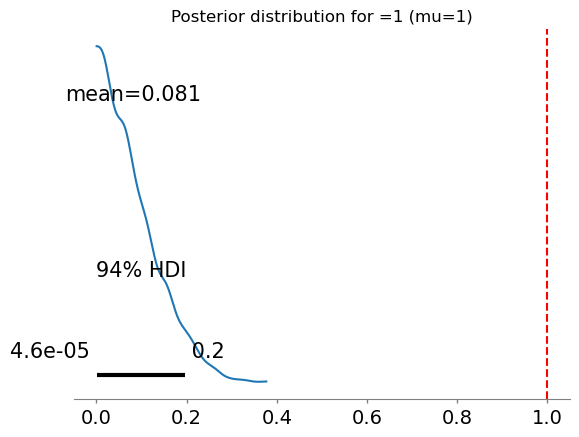

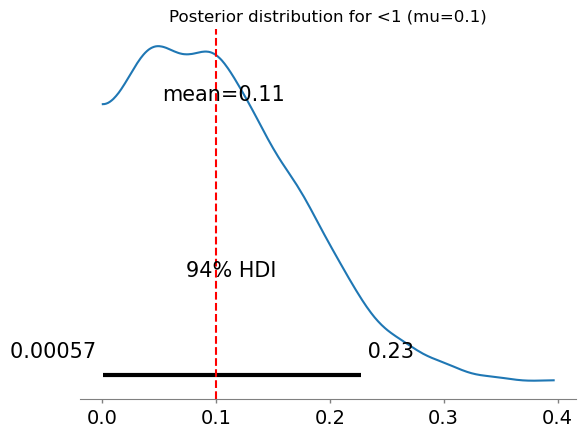

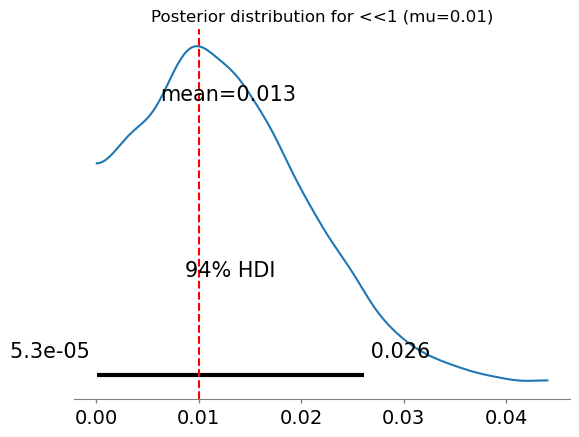

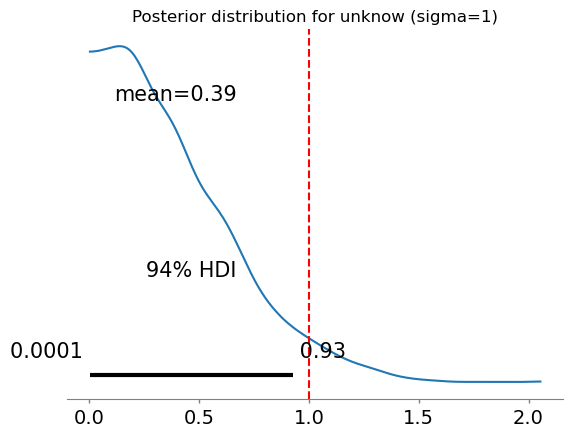

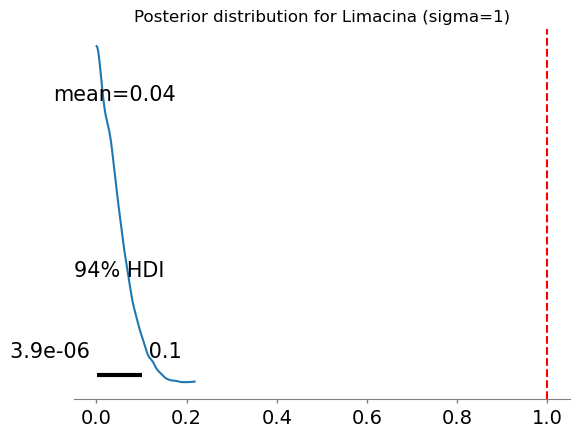

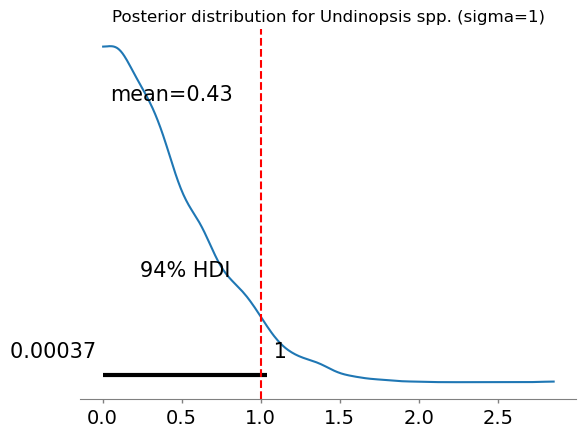

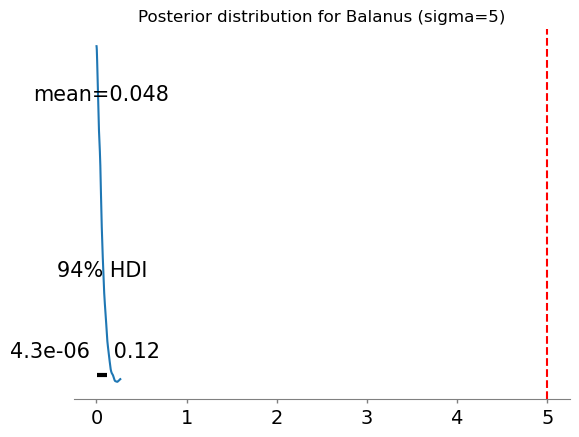

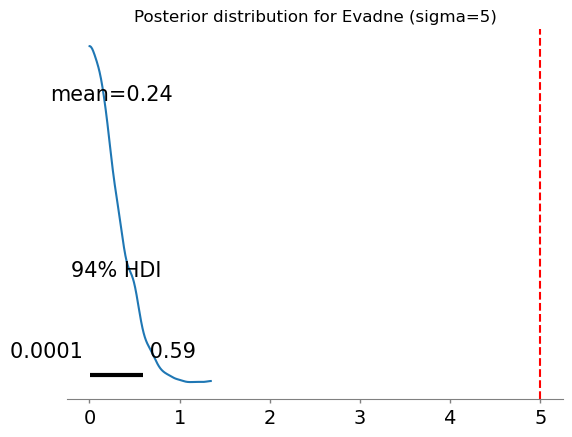

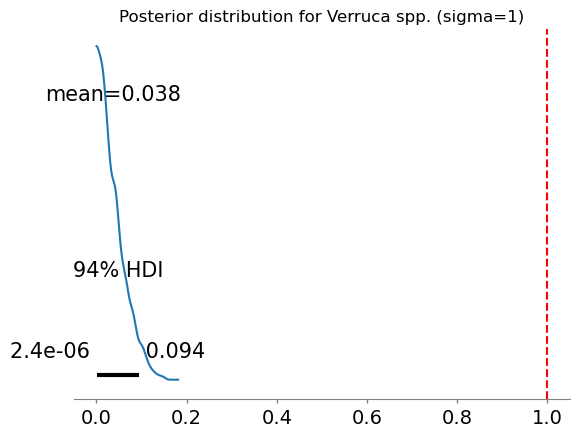

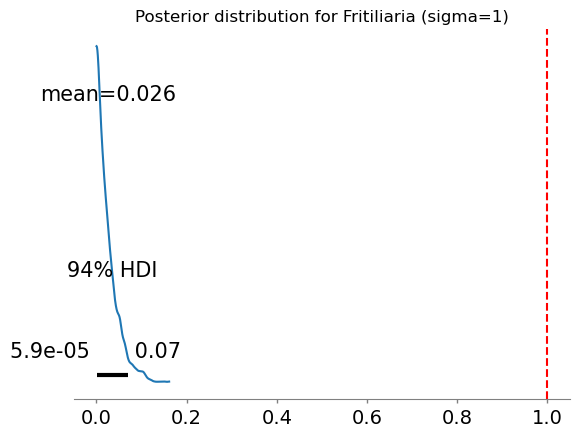

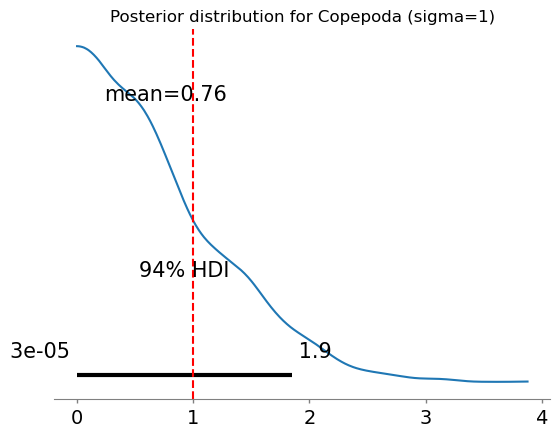

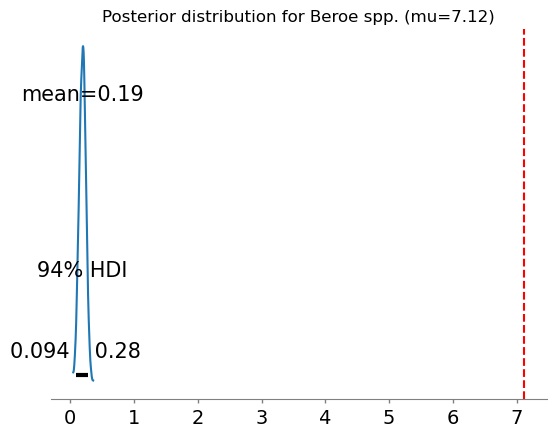

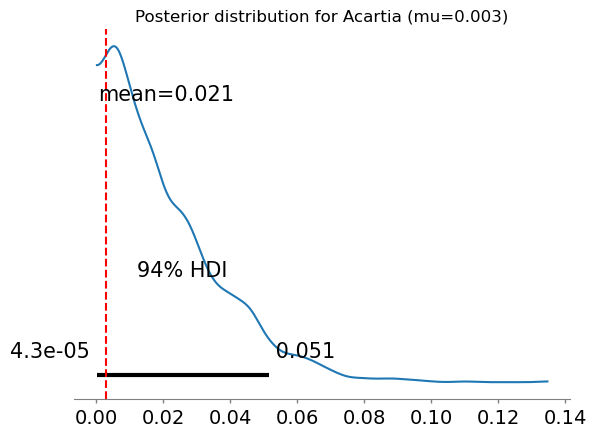

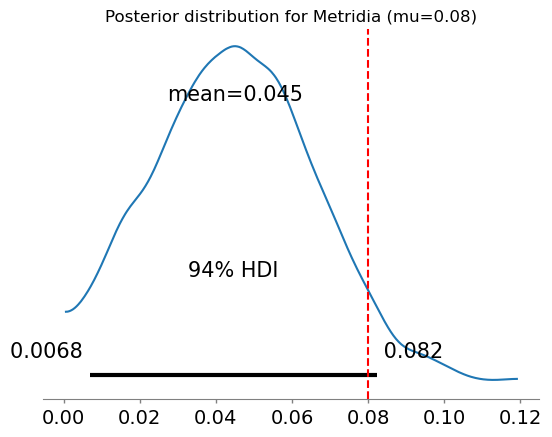

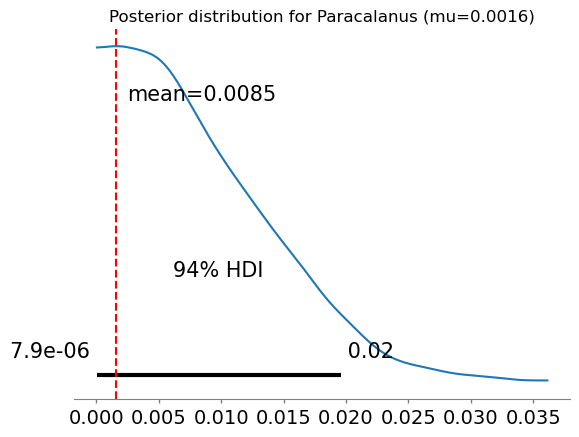

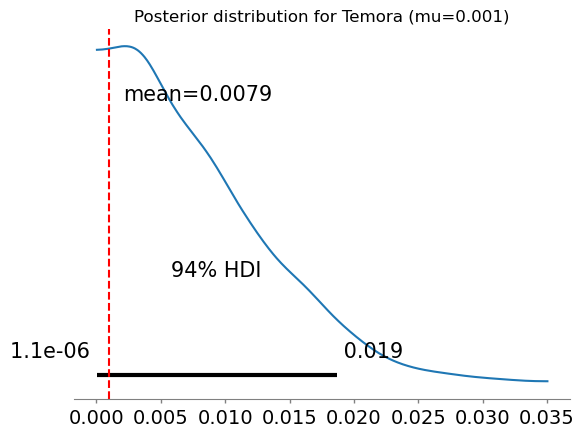

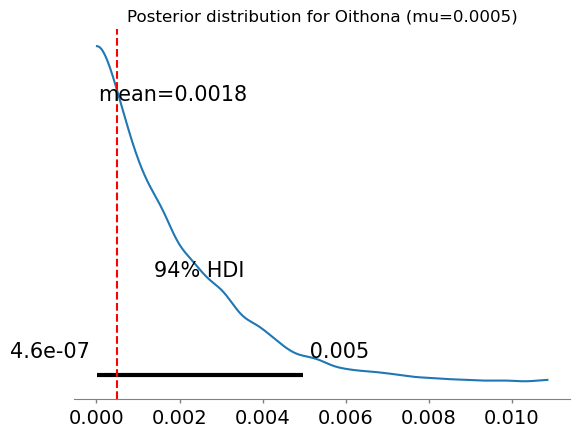

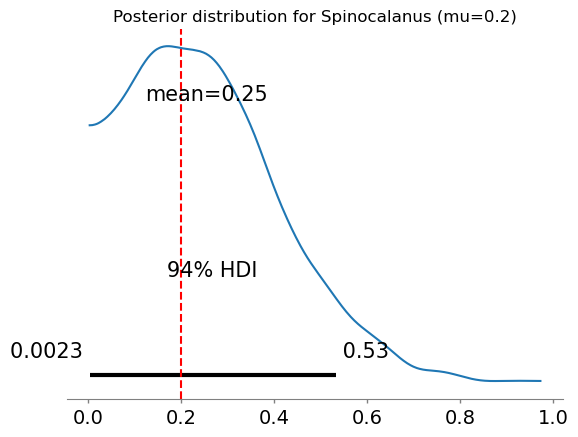

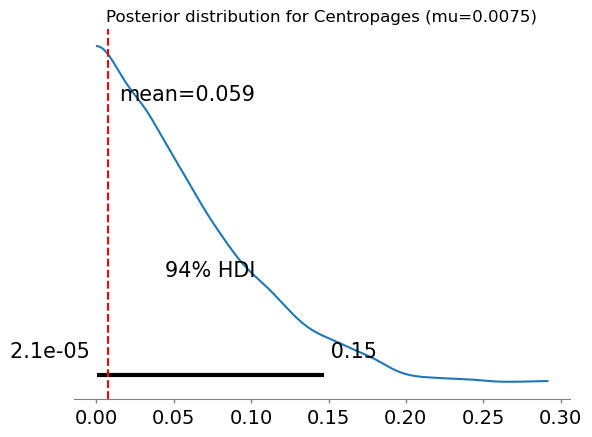

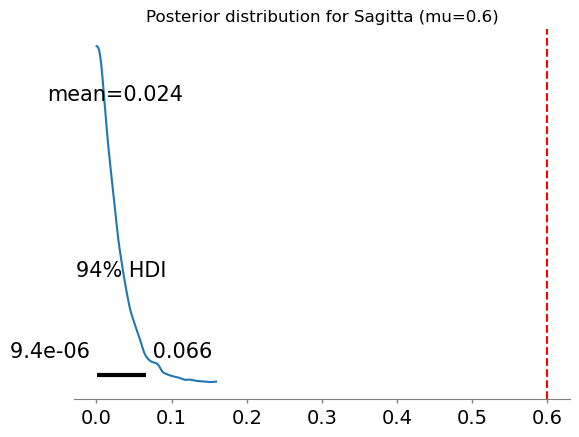

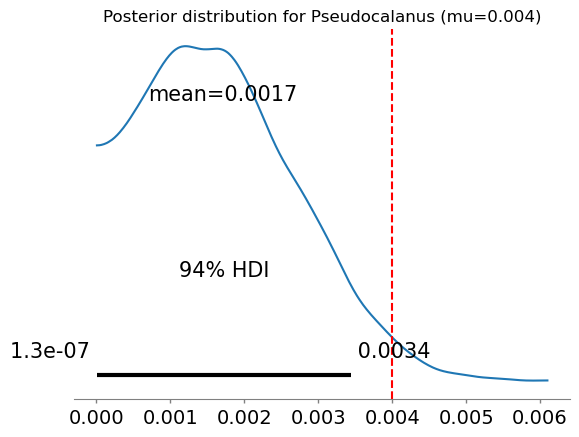

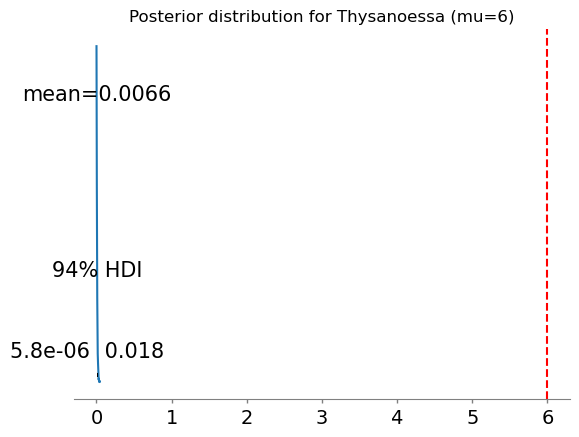

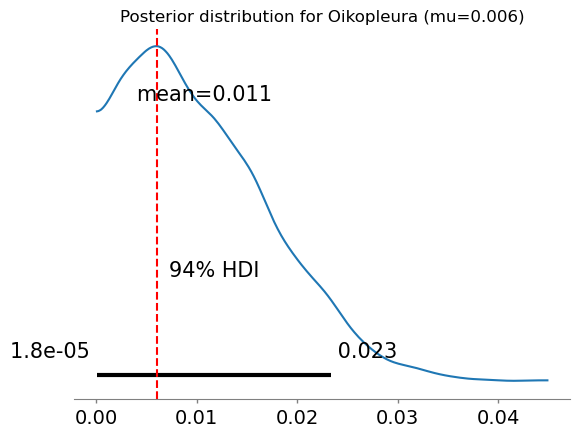

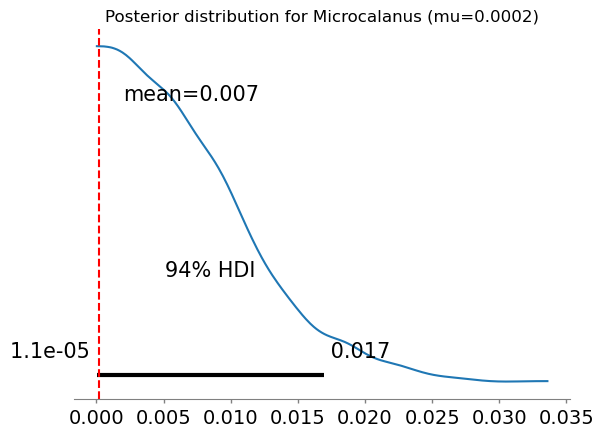

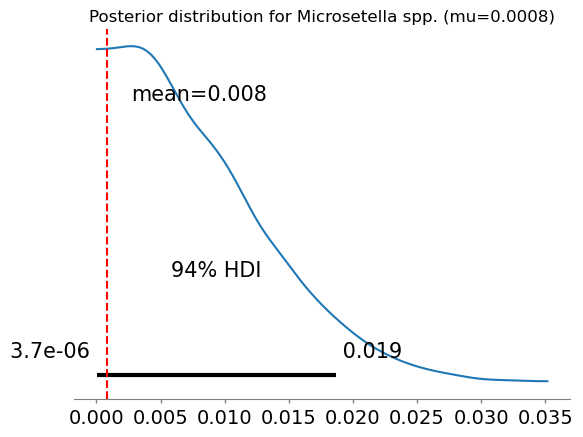

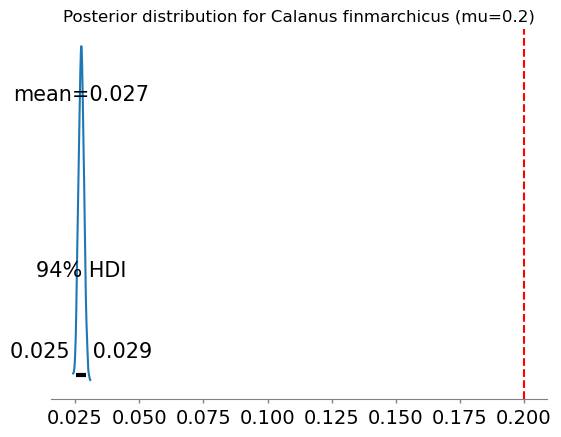

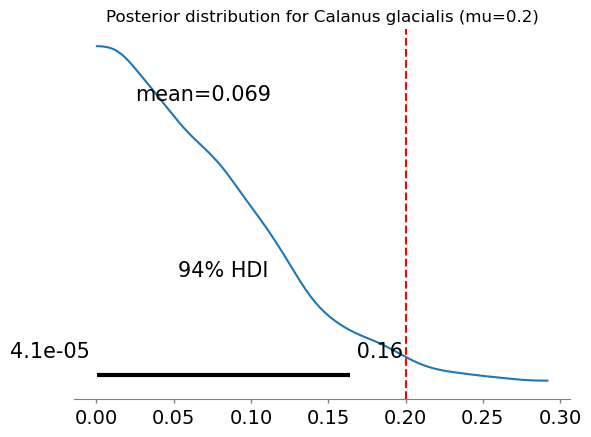

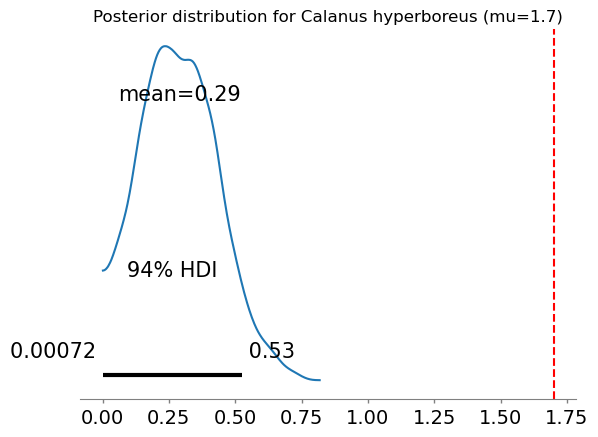

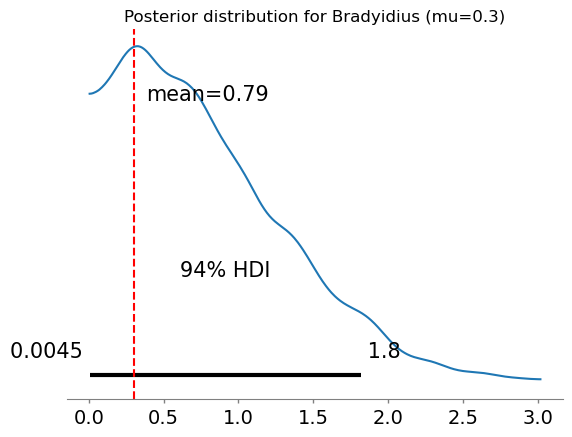

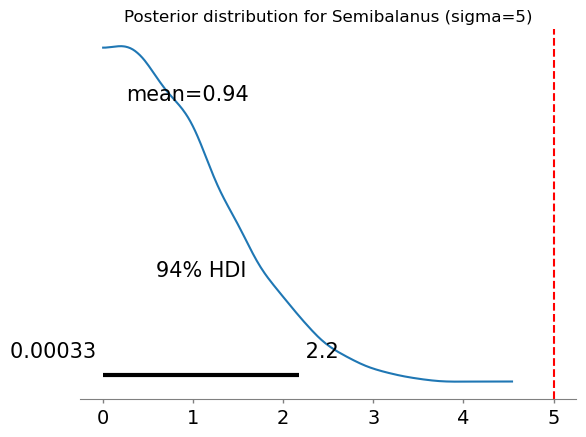

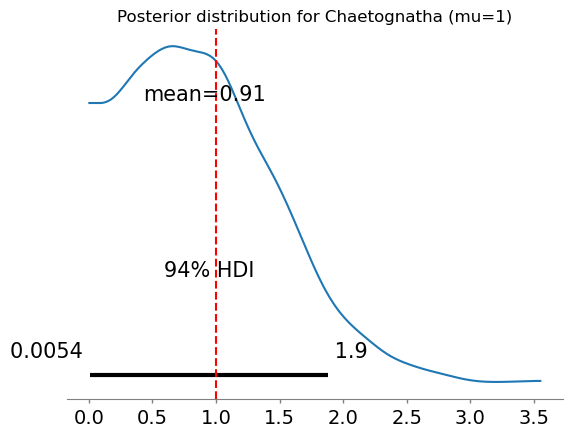

In [635]:
#plot posterior distribution and priors

import arviz as az
import matplotlib.pyplot as plt

# Après avoir exécuté le modèle et obtenu la trace
for species, params in priors.items():
    # Extraction des données postérieures pour l'espèce courante
    post_data = trace.get_values(species)
    
    # Tracé de la distribution postérieure
    az.plot_posterior(post_data)
    
    if 'mu' in params:
        # Si 'mu' est spécifié, ajoute une ligne verticale pour 'mu'
        plt.axvline(x=params['mu'], color='r', linestyle='--')
        plt.title(f"Posterior distribution for {species} (mu={params['mu']})")
    else:
        # Si 'mu' n'est pas spécifié, vérifier si 'sigma' est disponible et l'utiliser
        if 'sigma' in params:
            plt.axvline(x=params['sigma'], color='r', linestyle='--')
            plt.title(f"Posterior distribution for {species} (sigma={params['sigma']})")
        else:
            plt.title(f"Posterior distribution for {species}")
    
    plt.show()

In [636]:
# Detail of the inverse model prediction: here for Oithona similis
az.plot_trace(trace, var_names=['Oithona similis']) #Choose a group define ('Oithona similis' doesn't exist for some grouping strategy)
plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
/home/svivier/.conda/envs/sebpy/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


KeyError: 'var names: "[\'Oithona similis\'] are not present" in dataset'

In [637]:
import pandas as pd

somme_par_echantillon = COPEPOD80_reduite.sum(axis=1)

# Trouver la contribution maximale de chaque espèce
max_par_espece = COPEPOD80_reduite.max(axis=0)

# Initialiser un DataFrame pour stocker la contribution maximale en pourcentage
contribution_max_pourcentage = pd.DataFrame(index=max_par_espece.index)

# Calculer la contribution maximale en pourcentage pour chaque espèce
for espece in max_par_espece.index:
    # Trouver l'échantillon où l'espèce a sa contribution maximale
    echantillon_max = COPEPOD80_reduite[espece].idxmax()
    # Calculer la contribution en pourcentage
    contribution_max_pourcentage.at[espece, 'Contribution Max (%)'] = (COPEPOD80_reduite.at[echantillon_max, espece] / somme_par_echantillon[echantillon_max]) * 100



In [638]:
results_df = pd.concat([results_df, contribution_max_pourcentage], axis=1)

In [639]:
# results_df_especes= prediction for each species using result_df, the prediction for each group (usefull to plot result)

# Initialisation d'une liste pour stocker les données
especes_data = []

# Itérer sur chaque groupe et chaque espèce dans le groupe
for groupe, biomasse_data in results_df.iterrows():
    # Si le groupe est dans le dictionnaire groupes, itérer sur les espèces
    if groupe in groupes:
        for espece in groupes[groupe]:
            especes_data.append({
                'Espece': espece,
                'Biomasse moyenne': biomasse_data['median'],
                'HDI 25%': biomasse_data['HDI 25%'],
                'HDI 75%': biomasse_data['HDI 75%']
            })
    else:
        # Si le groupe n'est pas dans groupes, l'ajouter directement comme espèce
        especes_data.append({
            'Espece': groupe,
            'Biomasse moyenne': biomasse_data['median'],
            'HDI 25%': biomasse_data['HDI 25%'],
            'HDI 75%': biomasse_data['HDI 75%']
        })

# Créer le DataFrame à partir de la liste de dictionnaires
results_df_especes = pd.DataFrame(especes_data)

# Mettre 'Espèce' en tant qu'indice du DataFrame
results_df_especes.set_index('Espece', inplace=True)

# Afficher les résultats
results_df_especes

Biomasse moyenne   HDI 25%   HDI 75%
Espece                                                        
Euphysa spp.                         0.066  0.001257  0.116813
Hyperoche spp.                       0.066  0.001257  0.116813
Aetideopsis multiserrata             0.066  0.001257  0.116813
Chiridius obtusifrons                0.066  0.001257  0.116813
Gaetanus brevispinus                 0.066  0.001257  0.116813
...                                    ...       ...       ...
Calanus glacialis                    0.058  0.001505  0.100998
Calanus hyperboreus                  0.283  0.191989  0.444122
Bradyidius similis                   0.684  0.173519  1.129502
Semibalanus balanoides               0.808  0.099293  1.355513
Chaetognatha                         0.850  0.566266  1.282525

[145 rows x 3 columns]

In [640]:
# Here we define comined_df which is the matrix with the predicted ICWs and the AtlantECO for each Taxa

# Transposer other_df pour que les espèces deviennent des indices de lignes
CarbonMass_AtlantECO = CarbonMass_AtlantECO.T #A faire si combined_df n'est pas une matrice 144(nb of taxa) x 6(inversemodelprediction:Biomasse moyenne,	HDI 25%,	HDI 75% + AtlantECO ICWs (MaxCarbonMass	MeanCarbonMass	MinCarbonMass))


# Fusionner les deux jeux de données sur l'index 'Espèce', en gardant toutes les lignes de results_df_especes
combined_df = results_df_especes.join(CarbonMass_AtlantECO, how='left')

# Remplacer les valeurs NaN par 0 dans les colonnes venant de CarbonMass_AtlantECO
for column in CarbonMass_AtlantECO.columns:
    combined_df[column] = combined_df[column].fillna(0)


# Afficher le DataFrame combiné pour visualiser la comparaison
combined_df

Biomasse moyenne   HDI 25%   HDI 75%  MaxCarbonMass  \
Espece                                                                          
Acartia                              0.016  0.001000  0.029895       0.000000   
Acartia bifilosa                     0.016  0.001000  0.029895       0.001880   
Acartia longiremis                   0.016  0.001000  0.029895       0.005127   
Acartia spp.                         0.016  0.001000  0.029895       0.000000   
Aetideopsis multiserrata             0.066  0.001257  0.116813       0.506000   
...                                    ...       ...       ...            ...   
Undinella oblonga                    0.066  0.001257  0.116813       2.602523   
Undinopsis spp.                      0.351  0.016785  0.627081       0.000000   
Verruca spp.                         0.030  0.001295  0.053700       0.000000   
Zaus goodsiri                        0.012  0.007353  0.018201       0.001200   
Zaus spp.                            0.012  0.007353  0.018201       0.000000   

                          MeanCarbonMass  MinCarbonMass  
Espece                                                   
Acartia                         0.000000       0.000000  
Acartia bifilosa                0.001808       0.001736  
Acartia longiremis              0.004192       0.003352  
Acartia spp.                    0.000000       0.000000  
Aetideopsis multiserrata        0.341113       0.217600  
...                                  ...            ...  
Undinella oblonga               0.287791       0.017265  
Undinopsis spp.                 0.000000       0.000000  
Verruca spp.                    0.000000       0.000000  
Zaus goodsiri                   0.000890       0.000480  
Zaus spp.                       0.000000       0.000000  

[145 rows x 6 columns]

In [641]:
# Supprimer les lignes où les 3 dernières colonnes sont nulles (We keep only copepods data for plots)
filtered_df = combined_df.drop(combined_df[(combined_df.iloc[:, -3] == 0) & (combined_df.iloc[:, -2] == 0) & (combined_df.iloc[:, -1] == 0)].index)

# Afficher le DataFrame résultant pour vérifier
filtered_df


Biomasse moyenne   HDI 25%   HDI 75%  \
Espece                                                                 
Acartia bifilosa                           0.016  0.001000  0.029895   
Acartia longiremis                         0.016  0.001000  0.029895   
Aetideopsis multiserrata                   0.066  0.001257  0.116813   
Alteutha interrupta                        0.012  0.007353  0.018201   
Augaptilus glacialis                       0.066  0.001257  0.116813   
Bradyidius similis                         0.684  0.173519  1.129502   
Calanus finmarchicus                       0.027  0.027202  0.028563   
Calanus glacialis                          0.058  0.001505  0.100998   
Calanus hyperboreus                        0.283  0.191989  0.444122   
Candacia armata                            0.098  0.030362  0.151968   
Centropages hamatus                        0.047  0.001714  0.085565   
Centropages typicus                        0.047  0.001714  0.085565   
Chiridius obtusifrons                      0.066  0.001257  0.116813   
Danielssenia typica                        0.012  0.007353  0.018201   
Gaetanus brevispinus                       0.066  0.001257  0.116813   
Haloptilus acutifrons                      0.098  0.030362  0.151968   
Harpacticus chelifer                       0.012  0.007353  0.018201   
Harpacticus littoralis                     0.012  0.007353  0.018201   
Heterorhabdus norvegicus                   0.098  0.030362  0.151968   
Jaschnovia tolli                           0.066  0.001257  0.116813   
Metridia longa                             0.045  0.035627  0.071097   
Metridia lucens                            0.045  0.035627  0.071097   
Microcalanus pusillus                      0.006  0.000135  0.009954   
Microcalanus pygmaeus                      0.006  0.000135  0.009954   
Oithona atlantica                          0.001  0.000010  0.002663   
Oithona frigida                            0.001  0.000010  0.002663   
Oithona similis                            0.001  0.000010  0.002663   
Oncaea notopus                             0.012  0.007353  0.018201   
Paraeuchaeta glacialis                     0.066  0.001257  0.116813   
Paraeuchaeta norvegica                     0.066  0.001257  0.116813   
Paraheterorhabdus compactus                0.066  0.001257  0.116813   
Parathalestris croni                       0.012  0.007353  0.018201   
Parathalestris harpactoides                0.012  0.007353  0.018201   
Pseudocalanus elongatus                    0.002  0.001123  0.002446   
Pseudochirella spectabilis                 0.098  0.030362  0.151968   
Rhynchothalestris helgolandica             0.012  0.007353  0.018201   
Scaphocalanus brevicornis                  0.066  0.001257  0.116813   
Scaphocalanus magnus                       0.066  0.001257  0.116813   
Scolecithricella minor                     0.012  0.007353  0.018201   
Spinocalanus abyssalis                     0.236  0.115418  0.360623   
Spinocalanus magnus                        0.236  0.115418  0.360623   
Spinocalanus spinosus                      0.236  0.115418  0.360623   
Tegastes falcatus                          0.012  0.007353  0.018201   
Temora longicornis                         0.007  0.001065  0.011474   
Temorites brevis                           0.066  0.001257  0.116813   
Thalestris gibba                           0.012  0.007353  0.018201   
Tisbe furcata                              0.012  0.007353  0.018201   
Undinella oblonga                          0.066  0.001257  0.116813   
Zaus goodsiri                              0.012  0.007353  0.018201   

                                MaxCarbonMass  MeanCarbonMass  MinCarbonMass  
Espece                                                                        
Acartia bifilosa                     0.001880        0.001808       0.001736  
Acartia longiremis                   0.005127        0.004192       0.003352  
Aetideopsis multiserrata             0.5060

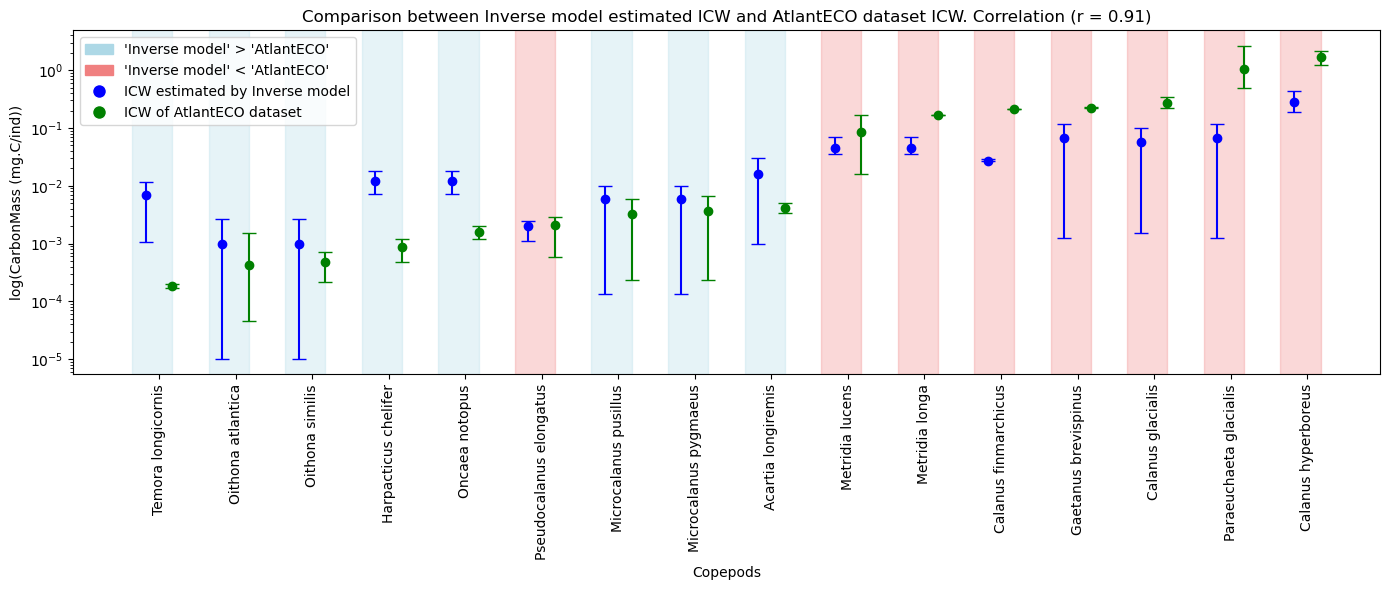

In [642]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import pearsonr

# Liste des espèces d'intérêt
species_of_interest = [
    "Calanus finmarchicus", "Calanus glacialis", "Calanus hyperboreus", 
    "Oithona atlantica", "Oithona similis", "Metridia longa", 
    "Metridia lucens", "Acartia longiremis", "Microcalanus pusillus", 
    "Microcalanus pygmaeus", "Pseudocalanus elongatus", "Temora longicornis", "Harpacticus chelifer", "Oncaea notopus", "Gaetanus brevispinus", "Paraeuchaeta glacialis"
]

# Filtrer les données pour inclure uniquement les espèces d'intérêt
subset = filtered_df[filtered_df.index.isin(species_of_interest)].sort_values(by='MeanCarbonMass')

plt.figure(figsize=(14, 6))

# Largeur des rectangles
rect_width = 0.35

# Positions des points
positions = np.arange(len(subset))

# Calculer le coefficient de corrélation de Pearson
correlation_coefficient, _ = pearsonr(subset['Biomasse moyenne'], subset['MeanCarbonMass'])

# Traverser chaque point pour colorer le fond
for i in positions:
    if subset.iloc[i]['Biomasse moyenne'] > subset.iloc[i]['MeanCarbonMass']:
        color = 'lightblue'
    else:
        color = 'lightcoral'

    # Dessiner un rectangle en arrière-plan pour chaque indice
    plt.axvspan(i - rect_width / 2, i + rect_width, color=color, alpha=0.3)

# Tracer les points après avoir coloré le fond
for i in positions:
    plt.errorbar(i, subset.iloc[i]['Biomasse moyenne'], 
                 yerr=[[subset.iloc[i]['Biomasse moyenne'] - subset.iloc[i]['HDI 25%']], [subset.iloc[i]['HDI 75%'] - subset.iloc[i]['Biomasse moyenne']]], 
                 fmt='o', color='blue', label='Carbonmass estimated Inverse model' if i == 0 else "", capsize=5)

    plt.errorbar(i + rect_width, subset.iloc[i]['MeanCarbonMass'], 
                 yerr=[[subset.iloc[i]['MeanCarbonMass'] - subset.iloc[i]['MinCarbonMass']], [subset.iloc[i]['MaxCarbonMass'] - subset.iloc[i]['MeanCarbonMass']]], 
                 fmt='o', color='green', label='Carbonmass conversion AtlantECO dataset' if i == 0 else "", capsize=5)

# Créer des patchs pour la légende des couleurs de fond
blue_patch = mpatches.Patch(color='lightblue', label="'Inverse model' > 'AtlantECO'")
coral_patch = mpatches.Patch(color='lightcoral', label="'Inverse model' < 'AtlantECO'")

plt.xlabel('Copepods')
plt.ylabel('log(CarbonMass (mg.C/ind))')
plt.title(f'Comparison between Inverse model estimated ICW and AtlantECO dataset ICW. Correlation (r = {correlation_coefficient:.2f})')
plt.xticks([r + rect_width / 2 for r in range(len(positions))], subset.index, rotation=90)

# Placer la légende à l'extérieur du graphique, en utilisant une colonne pour augmenter la largeur
plt.legend(handles=[blue_patch, coral_patch, plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='ICW estimated by Inverse model'), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='ICW of AtlantECO dataset')], loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.savefig(Plot_PATH + 'result_model.pdf')
plt.show()


In [643]:
import pandas as pd

# Filtrer les données pour les espèces avec MeanCarbonMass < 0.001
subset_less_0_001 = subset[subset['MeanCarbonMass'] < 0.001]
mean_diff_less_0_001 = (subset_less_0_001['Biomasse moyenne'] - subset_less_0_001['MeanCarbonMass']).mean()
std_diff_less_0_001 = (subset_less_0_001['Biomasse moyenne'] - subset_less_0_001['MeanCarbonMass']).std()

print(f"Pour les espèces avec MeanCarbonMass < 0.001:")
print(f"Différence moyenne: {mean_diff_less_0_001}")
print(f"Écart type: {std_diff_less_0_001}")

# Filtrer les données pour les espèces avec 0.001 <= MeanCarbonMass <= 1
subset_between_0_001_and_1 = subset[(subset['MeanCarbonMass'] >= 0.001) & (subset['MeanCarbonMass'] <= 1)]
mean_diff_between_0_001_and_1 = (subset_between_0_001_and_1['Biomasse moyenne'] - subset_between_0_001_and_1['MeanCarbonMass']).mean()
std_diff_between_0_001_and_1 = (subset_between_0_001_and_1['Biomasse moyenne'] - subset_between_0_001_and_1['MeanCarbonMass']).std()

print(f"\nPour les espèces avec 0.001 <= MeanCarbonMass <= 1:")
print(f"Différence moyenne: {mean_diff_between_0_001_and_1}")
print(f"Écart type: {std_diff_between_0_001_and_1}")

Pour les espèces avec MeanCarbonMass < 0.001:
Différence moyenne: 0.004752570851677053
Écart type: 0.005168519702328616

Pour les espèces avec 0.001 <= MeanCarbonMass <= 1:
Différence moyenne: -0.06969787867731977
Écart type: 0.09152559048149127


In [644]:
import pandas as pd

# Liste des espèces d'intérêt
species_of_interest = [
    "Calanus finmarchicus", "Calanus glacialis", "Calanus hyperboreus", 
    "Oithona atlantica", "Oithona similis", "Metridia longa", 
    "Metridia lucens", "Acartia longiremis", "Microcalanus pusillus", 
    "Microcalanus pygmaeus", "Pseudocalanus elongatus", "Temora longicornis", 
    "Harpacticus chelifer", "Oncaea notopus", "Gaetanus brevispinus", "Paraeuchaeta glacialis"
]

# Supposons que `filtered_df` soit votre DataFrame initialement filtré
# Filtrer les données pour inclure uniquement les espèces d'intérêt
subset = filtered_df[filtered_df.index.isin(species_of_interest)].sort_values(by='MeanCarbonMass')

# Fonction pour calculer le facteur de différence
def difference_factor(mean_carbon_mass, biomasse_moyenne):
    return biomasse_moyenne / mean_carbon_mass

# Filtrer les données pour les espèces avec MeanCarbonMass < 0.001
subset_less_0_001 = subset[subset['MeanCarbonMass'] < 0.001]
factor_diff_less_0_001 = difference_factor(subset_less_0_001['MeanCarbonMass'], subset_less_0_001['Biomasse moyenne'])
mean_factor_diff_less_0_001 = factor_diff_less_0_001.mean()
std_factor_diff_less_0_001 = factor_diff_less_0_001.std()

print(f"Pour les espèces avec MeanCarbonMass < 0.001:")
print(f"Différence moyenne (facteur): {mean_factor_diff_less_0_001:.2f}")
print(f"Écart type (facteur): {std_factor_diff_less_0_001:.2f}")

# Filtrer les données pour les espèces avec 0.001 <= MeanCarbonMass <= 1
subset_between_0_001_and_1 = subset[(subset['MeanCarbonMass'] >= 0.001) & (subset['MeanCarbonMass'] <= 1)]
factor_diff_between_0_001_and_1 = difference_factor(subset_between_0_001_and_1['MeanCarbonMass'], subset_between_0_001_and_1['Biomasse moyenne'])
mean_factor_diff_between_0_001_and_1 = factor_diff_between_0_001_and_1.mean()
std_factor_diff_between_0_001_and_1 = factor_diff_between_0_001_and_1.std()

print(f"\nPour les espèces avec 0.001 <= MeanCarbonMass <= 1:")
print(f"Différence moyenne (facteur): {mean_factor_diff_between_0_001_and_1:.2f}")
print(f"Écart type (facteur): {std_factor_diff_between_0_001_and_1:.2f}")


Pour les espèces avec MeanCarbonMass < 0.001:
Différence moyenne (facteur): 14.01
Écart type (facteur): 16.97

Pour les espèces avec 0.001 <= MeanCarbonMass <= 1:
Différence moyenne (facteur): 1.71
Écart type (facteur): 2.32


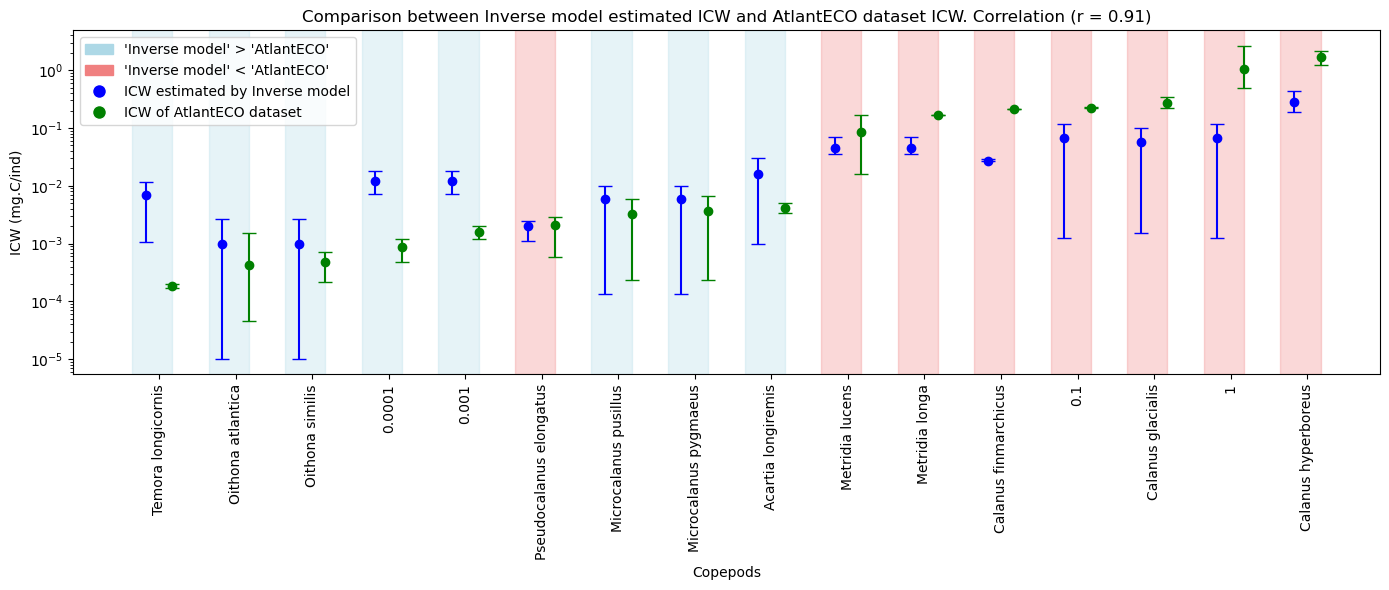

                        Biomasse moyenne   HDI 25%   HDI 75%  MaxCarbonMass  \
Espece                                                                        
Harpacticus chelifer               0.012  0.007353  0.018201       0.001200   
Oncaea notopus                     0.012  0.007353  0.018201       0.001994   
Gaetanus brevispinus               0.066  0.001257  0.116813       0.229500   
Paraeuchaeta glacialis             0.066  0.001257  0.116813       2.624453   

                        MeanCarbonMass  MinCarbonMass  
Espece                                                 
Harpacticus chelifer          0.000890       0.000480  
Oncaea notopus                0.001609       0.001209  
Gaetanus brevispinus          0.223550       0.217600  
Paraeuchaeta glacialis        1.067903       0.494358  


In [645]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import pearsonr

# Liste des espèces d'intérêt
species_of_interest = [
    "Calanus finmarchicus", "Calanus glacialis", "Calanus hyperboreus", 
    "Oithona atlantica", "Oithona similis", "Metridia longa", 
    "Metridia lucens", "Acartia longiremis", "Microcalanus pusillus", 
    "Microcalanus pygmaeus", "Pseudocalanus elongatus", "Temora longicornis", 
    "Harpacticus chelifer", "Oncaea notopus", "Gaetanus brevispinus", "Paraeuchaeta glacialis"
]

# Filtrer les données pour inclure uniquement les espèces d'intérêt
subset = filtered_df[filtered_df.index.isin(species_of_interest)].sort_values(by='MeanCarbonMass')

plt.figure(figsize=(14, 6))

# Largeur des rectangles
rect_width = 0.35

# Positions des points
positions = np.arange(len(subset))

# Calculer le coefficient de corrélation de Pearson
correlation_coefficient, _ = pearsonr(subset['Biomasse moyenne'], subset['MeanCarbonMass'])

# Traverser chaque point pour colorer le fond
for i in positions:
    if subset.iloc[i]['Biomasse moyenne'] > subset.iloc[i]['MeanCarbonMass']:
        color = 'lightblue'
    else:
        color = 'lightcoral'

    # Dessiner un rectangle en arrière-plan pour chaque indice
    plt.axvspan(i - rect_width / 2, i + rect_width, color=color, alpha=0.3)

# Tracer les points après avoir coloré le fond
for i in positions:
    biomasse_moyenne = subset.iloc[i]['Biomasse moyenne']
    mean_carbon_mass = subset.iloc[i]['MeanCarbonMass']
    hdi_3 = subset.iloc[i]['HDI 25%']
    hdi_97 = subset.iloc[i]['HDI 75%']
    min_carbon_mass = subset.iloc[i]['MinCarbonMass']
    max_carbon_mass = subset.iloc[i]['MaxCarbonMass']

    # Assurer qu'il n'y a pas de valeurs yerr négatives
    yerr_biomasse = np.array([[biomasse_moyenne - hdi_3], [hdi_97 - biomasse_moyenne]])
    yerr_carbonmass = np.array([[mean_carbon_mass - min_carbon_mass], [max_carbon_mass - mean_carbon_mass]])

    yerr_biomasse = np.where(yerr_biomasse < 0, 0, yerr_biomasse)
    yerr_carbonmass = np.where(yerr_carbonmass < 0, 0, yerr_carbonmass)

    plt.errorbar(i, biomasse_moyenne, 
                 yerr=yerr_biomasse, 
                 fmt='o', color='blue', label='Carbonmass estimated Inverse model' if i == 0 else "", capsize=5)

    plt.errorbar(i + rect_width, mean_carbon_mass, 
                 yerr=yerr_carbonmass, 
                 fmt='o', color='green', label='Carbonmass conversion AtlantECO dataset' if i == 0 else "", capsize=5)

# Créer des patchs pour la légende des couleurs de fond
blue_patch = mpatches.Patch(color='lightblue', label="'Inverse model' > 'AtlantECO'")
coral_patch = mpatches.Patch(color='lightcoral', label="'Inverse model' < 'AtlantECO'")

# Personnaliser les étiquettes de l'axe des x
custom_labels = ["0.0001" if sp == "Harpacticus chelifer" else 
                 "0.001" if sp == "Oncaea notopus" else 
                 "0.1" if sp == "Gaetanus brevispinus" else 
                 "1" if sp == "Paraeuchaeta glacialis" else sp 
                 for sp in subset.index]

plt.xlabel('Copepods')
plt.ylabel('ICW (mg.C/ind)')
plt.title(f'Comparison between Inverse model estimated ICW and AtlantECO dataset ICW. Correlation (r = {correlation_coefficient:.2f})')
plt.xticks([r + rect_width / 2 for r in range(len(positions))], custom_labels, rotation=90)

# Placer la légende à l'extérieur du graphique, en utilisant une colonne pour augmenter la largeur
plt.legend(handles=[blue_patch, coral_patch, plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='ICW estimated by Inverse model'), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='ICW of AtlantECO dataset')], loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.savefig(Plot_PATH + 'ICW_Model_vs_AtlantECO.pdf')
plt.show()

# Afficher les résultats pour certaines espèces spécifiques
selected_species = ["Harpacticus chelifer", "Oncaea notopus", "Gaetanus brevispinus", "Paraeuchaeta glacialis"]
selected_subset = subset[subset.index.isin(selected_species)]

# Afficher le sous-ensemble sélectionné
print(selected_subset)


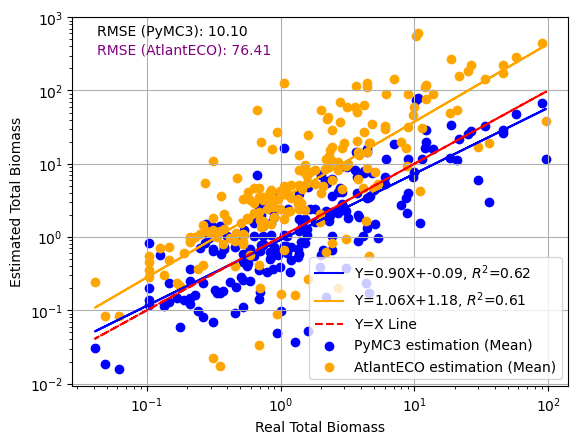

In [650]:
# Estimated biomasses in function of the real biomass using inversemodel ICWs and AtlantECO ICWs
# Use X_test and Biomass_test for the evaluation of the  test set, Use X_train and Biomass_train for the evaluation of the  train set

import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Assurez-vous que les indices de Biomass_test et X_test sont identiques
assert Biomass_test.index.equals(X_test.index), "Les indices de Biomass_test et X_test ne sont pas identiques."

# Conversion des valeurs en arrays numpy
BIOMASS_sampled = Biomass_test.values.flatten()
ABONDANCE_sampled = X_test.values.astype(float)

# Suppression des doublons dans l'index de combined_df
combined_df = combined_df.loc[~combined_df.index.duplicated(keep='first')]

# Réindexer combined_df selon les colonnes de X_test pour s'assurer que les données sont alignées
biomass_mean_aligned = combined_df['Biomasse moyenne'].reindex(X_test.columns, fill_value=0)
biomass_mass_aligned = combined_df['MeanCarbonMass'].reindex(X_test.columns, fill_value=0)

# Calcul de la biomasse totale estimée pour chaque échantillon avec les valeurs alignées
Biomass_total_estim = np.dot(ABONDANCE_sampled, biomass_mean_aligned)
Biomass_total_estim_mass = np.dot(ABONDANCE_sampled, biomass_mass_aligned)

# Gestion des zéros ou valeurs négatives avant la transformation logarithmique
BIOMASS_sampled_log = np.where(BIOMASS_sampled <= 0, np.nan, BIOMASS_sampled)
Biomass_total_estim_log = np.where(Biomass_total_estim <= 0, np.nan, Biomass_total_estim)
Biomass_total_estim_mass_log = np.where(Biomass_total_estim_mass <= 0, np.nan, Biomass_total_estim_mass)

# Fonction pour calculer le RMSE
def calculate_rmse(observed, estimated):
    valid_mask = ~np.isnan(observed) & ~np.isnan(estimated)
    residuals = observed[valid_mask] - estimated[valid_mask]
    return np.sqrt(np.mean(residuals**2))

# Calcul du RMSE pour les deux ensembles de données estimées
rmse_mean = calculate_rmse(BIOMASS_sampled_log, Biomass_total_estim_log)
rmse_mass = calculate_rmse(BIOMASS_sampled_log, Biomass_total_estim_mass_log)

# Tracé des estimations avec Biomasse moyenne
plt.scatter(BIOMASS_sampled_log, Biomass_total_estim_log, label='PyMC3 estimation (Mean)', color='blue')

# Tracé des estimations avec MeanCarbonMass
plt.scatter(BIOMASS_sampled_log, Biomass_total_estim_mass_log, label='AtlantECO estimation (Mean)', color='orange')

# Ajout de la régression linéaire pour les données avec Biomasse moyenne
valid_indices = ~np.isnan(BIOMASS_sampled_log) & ~np.isnan(Biomass_total_estim_log)
slope, intercept, r_value, p_value, std_err = linregress(np.log(BIOMASS_sampled_log[valid_indices]), np.log(Biomass_total_estim_log[valid_indices]))
line = np.exp(np.log(BIOMASS_sampled_log) * slope + intercept)
plt.plot(BIOMASS_sampled_log, line, color='blue', label=f'Y={slope:.2f}X+{intercept:.2f}, $R^2$={r_value**2:.2f}')

# Ajout de la régression linéaire pour les données avec MeanCarbonMass
valid_indices_mass = ~np.isnan(BIOMASS_sampled_log) & ~np.isnan(Biomass_total_estim_mass_log)
slope_mass, intercept_mass, r_value_mass, p_value_mass, std_err_mass = linregress(np.log(BIOMASS_sampled_log[valid_indices_mass]), np.log(Biomass_total_estim_mass_log[valid_indices_mass]))
line_mass = np.exp(np.log(BIOMASS_sampled_log) * slope_mass + intercept_mass)
plt.plot(BIOMASS_sampled_log, line_mass, color='orange', label=f'Y={slope_mass:.2f}X+{intercept_mass:.2f}, $R^2$={r_value_mass**2:.2f}')

# Ajout de la courbe x=y
plt.plot(BIOMASS_sampled_log, BIOMASS_sampled_log, color='red', linestyle='--', label='Y=X Line')

# Configuration du graphique
plt.annotate(f'RMSE (PyMC3): {rmse_mean:.2f}', (0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black')
plt.annotate(f'RMSE (AtlantECO): {rmse_mass:.2f}', (0.05, 0.90), xycoords='axes fraction', fontsize=10, color='purple')

# Affichage du graphique
plt.xlabel('Real Total Biomass')
plt.ylabel('Estimated Total Biomass')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


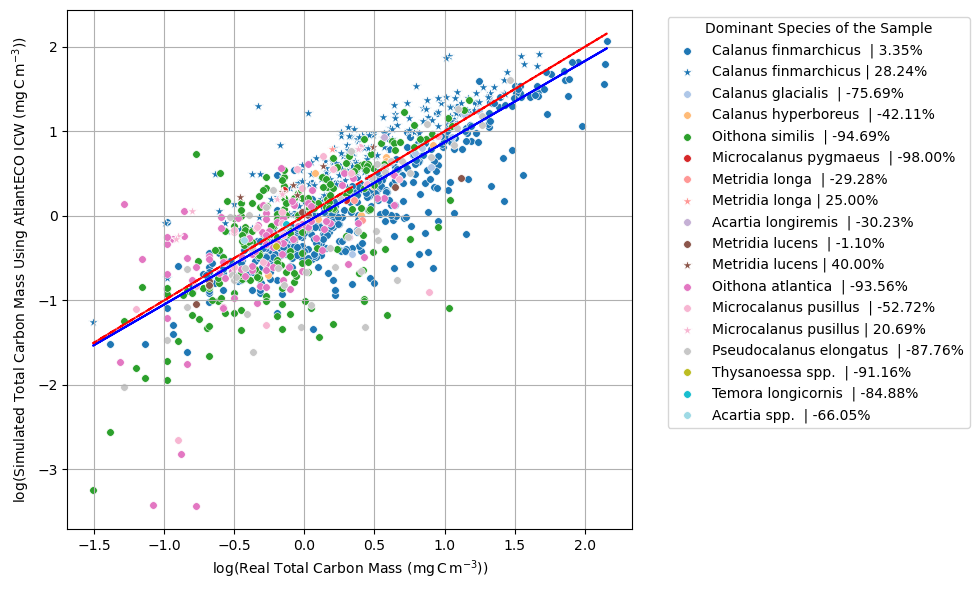

In [652]:
# Plot on the total dataset ('COPEPOD80_BIOMASS'= final Total biomass matrix and 'COPEPOD80_df_clean'= final abundance matrix   (Test+Train))
# combined_df['MeanCarbonMass'] is for the prediction using the mean AtlantECO ICWs, combined_df['Biomasse moyenne'] is for the prediction using the median ICWs predicted by our model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from matplotlib.cm import get_cmap

# Suppression des doublons dans l'index de combined_df
combined_df = combined_df.loc[~combined_df.index.duplicated(keep='first')]

# Calculer la biomasse simulée
mean_carbon_mass = combined_df['Biomasse moyenne'].reindex(COPEPOD80_df_clean.columns, fill_value=0)
simulated_biomass = COPEPOD80_df_clean.dot(mean_carbon_mass)

# Identifier l'espèce dominante et calculer sa biomasse
dominant_species = COPEPOD80_df_clean.idxmax(axis=1)
dominant_biomass = COPEPOD80_df_clean.max(axis=1).to_numpy() * mean_carbon_mass.reindex(dominant_species.values).to_numpy()

# Calcul de la différence en pourcentage
percentage_diff = ((dominant_biomass - COPEPOD80_BIOMASS['Carbon Mass'].to_numpy()) / COPEPOD80_BIOMASS['Carbon Mass'].to_numpy()) * 100

# Régression linéaire sur les données log-transformées
y = np.log10(simulated_biomass.replace(0, np.nan).dropna().to_numpy())
x = np.log10(COPEPOD80_BIOMASS['Carbon Mass'].to_numpy())

slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Générer une color_map automatiquement
species_list = dominant_species.unique()
cmap = get_cmap('tab20', len(species_list))  # Utiliser une palette avec suffisamment de couleurs
color_map = {species: cmap(i) for i, species in enumerate(species_list)}

# Préparation de la figure
plt.figure(figsize=(10, 6))
stats = {}

for species, color in color_map.items():
    idx_species = dominant_species == species
    idx_star = (dominant_biomass > COPEPOD80_BIOMASS['Carbon Mass'].to_numpy()) & idx_species.to_numpy()
    idx_point = (dominant_biomass <= COPEPOD80_BIOMASS['Carbon Mass'].to_numpy()) & idx_species.to_numpy()

    count_star = np.sum(idx_star)
    count_point = np.sum(idx_point)
    count_total = np.sum(idx_species)
    mean_diff = np.mean(percentage_diff[idx_species.to_numpy()])
    over_estimation_ratio = (count_star / count_total) * 100 if count_total > 0 else 0

    # Enregistrement des statistiques pour chaque espèce
    stats[species] = (mean_diff, over_estimation_ratio)

    # Ajustement des étiquettes pour les légendes
    legend_label_point = f'{species}  | {mean_diff:.2f}%'
    legend_label_star = f'{species} | {over_estimation_ratio:.2f}%'

    sns.scatterplot(x=x[idx_point], y=y[idx_point], s=30, color=color, marker='o', label=legend_label_point)
    if count_star > 0:
        sns.scatterplot(x=x[idx_star], y=y[idx_star], s=60, color=color, marker='*', label=legend_label_star)

# Mettre à jour les légendes pour mettre les pourcentages en gras
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = []
for label in labels:
    if '*' in label:
        parts = label.split('|')
        new_labels.append(f'{parts[0]}| <b>{parts[1]}</b>')
    else:
        new_labels.append(label)

plt.plot(x, line, 'blue', label=f'Regression: {equation}')
plt.plot(x, x, 'r--', label='y = x')
plt.xlabel('log(Real Total Carbon Mass $(\mathrm{mg\,C\,m^{-3}})$)')
plt.ylabel('log(Simulated Total Carbon Mass Using AtlantECO ICW $(\mathrm{mg\,C\,m^{-3}})$)')
plt.legend(handles=handles, labels=new_labels, title='Dominant Species of the Sample', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True)
plt.tight_layout()
plt.savefig(Plot_PATH + 'Evaluation_AtlantECO.pdf')
plt.show()